# PEC 1 Asignatura Aprendizaje Automático Aplicado

## Máster en Data Science - UCJC

### Curso 2024/2025

### ALUMNO

Fernández Santos, Alberto

### EJERCICIO 1

##### Cargar un set de datos y división en distintos porcentajes de train/test


- Descarga un dataset de los reseñados arriba
- Describe las dimensiones del Dataset
- Define si es para hacer Regresión y Clasificación y por qué
- Divide los datos en conjuntos de TRAIN y TEST (en diferentes % de test). Pruebe diferentes parámetros del método train_test_split de Scikit-Learn
- Evalua las características, dimensiones y contenido de los conjuntos de datos resultantes al dividirlos

**Descarga un dataset de los reseñados arriba**

In [1148]:
import pandas as pd
from sklearn.datasets import load_iris

# Descargamos Dataset "Iris dataset"
iris_dataset = load_iris()

# Guardamos las features en formato DataFrame
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)

# Agregamos las etiquetas numéricas (target) al DataFrame
df['species_dummy'] = iris_dataset.target

# Agregamos las etiquetas en formato string al DataFrame
df['species'] = df['species_dummy'].map(lambda x: iris_dataset.target_names[x])

# Visualizamos las 5 primeras muestras del dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_dummy,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


En resumen, se ha cargado el dataset `Iris` proporcionado por la librería `scikit-learn` y se ha almacenado en un DataFrame tanto las variables independientes (features) como la variable dependiente (target) en dos formatos distintos (variable categórica numérica tipo entero y tipo string).

**Describe las dimensiones del Dataset**

In [1151]:
df.shape

(150, 6)

El dataset `Iris` está formado por:

- Estructura bidimensional. Las filas corresponden a las muestras y las columnas a las variables (features y target)
- 150 muestras
- 4 features:
    - `sepal length (cm)`: longitud del sépalo en cm (variable tipo float)
    - `sepal width (cm)`: ancho del sépalo en cm (variable tipo float)
    - `petal length (cm)`: longitud del pétalo en cm (variable tipo float)
    - `petal width (cm)`: ancho del pétalo en cm (variable tipo float)
- La variable target indica la especie de la muestra (variable categórica). Se ha añadido al Dataframe la variable target en dos formatos distintos (numérico tipo entero y string)

**Define si es para hacer Regresión y Clasificación y por qué**

In [1154]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

El dataset `Iris` está diseñado para la creación de un modelo de `Clasificación` debido a que la variable target se trata de una variable categórica. En concreto, dicha variable tiene 3 tipos de especies de plantas (Setosa, Versicolor y Virginica). Por lo tanto, el objetivo del modelo será <u>clasificar</u> el tipo de especie en función de las características de la planta (longitud/ancho del sépalo y longitud/ancho del pétalo).

**Divide los datos en conjuntos de TRAIN y TEST (en diferentes % de test). Pruebe diferentes parámetros del método train_test_split de Scikit-Learn**

In [1157]:
# Guardamos las features en la variable X
X = df[iris_dataset.feature_names]

# Guardamos los targets en la variable y
y = df['species_dummy']

In [1158]:
# Verificamos la ausencia de valores NaN
df.isna().sum().sum()

0

No existen valores NaN en el dataset.

In [1160]:
import numpy as np
from sklearn.model_selection import train_test_split

# Instanciamos vector con distintos porcentajes de tamaño para el conjunto test
test_sizes = np.arange(0.05, 0.4, 0.05)

# Inicializamos listas para almacenar tamaños de los conjuntos a crear
X_train_size_list = []
X_test_size_list = []
y_train_size_list = []
y_test_size_list = []

# Bucle para crear conjuntos train y test con distintos %
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) # Se emplea semilla para reproducibilidad de resultados
    
    X_train_size_list.append(len(X_train))
    X_test_size_list.append(len(X_test))
    y_train_size_list.append(len(y_train))
    y_test_size_list.append(len(y_test))

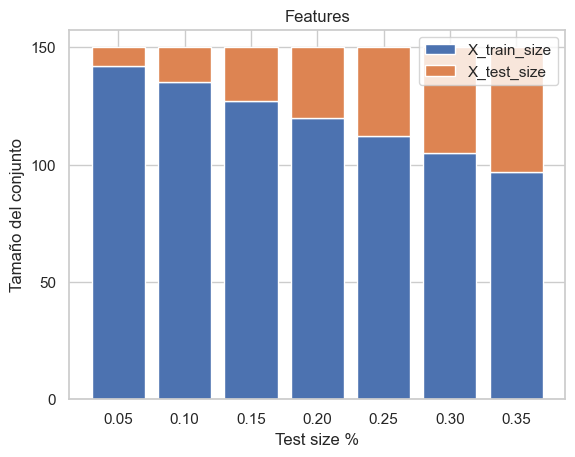

In [1161]:
import matplotlib.pyplot as plt

# Representación gráfica de los distintos conjuntos train creados 
# Creamos un gráfico de barras apiladas
plt.bar(test_sizes, X_train_size_list, width = 0.04, label='X_train_size')
plt.bar(test_sizes, X_test_size_list, bottom=X_train_size_list, width = 0.04, label='X_test_size')

# Ajustar el rango del eje Y
plt.yticks(np.arange(0, 160, 50))  # Establece el límite inferior en 0 y el límite superior en 12

# Añadir título y etiquetas
plt.title('Features')
plt.xlabel('Test size %')
plt.ylabel('Tamaño del conjunto')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

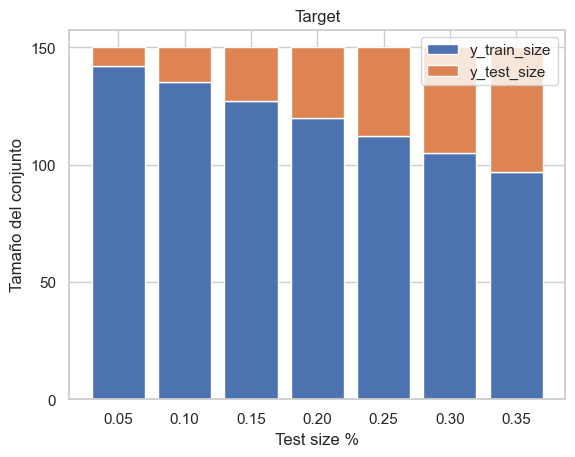

In [1162]:
# Representación gráfica de los distintos conjuntos train creados 
# Creamos un gráfico de barras apiladas
plt.bar(test_sizes, y_train_size_list, width = 0.04, label='y_train_size')
plt.bar(test_sizes, y_test_size_list, bottom=y_train_size_list, width = 0.04, label='y_test_size')

# Ajustar el rango del eje Y
plt.yticks(np.arange(0, 160, 50))  # Establece el límite inferior en 0 y el límite superior en 12

# Añadir título y etiquetas
plt.title('Target')
plt.xlabel('Test size %')
plt.ylabel('Tamaño del conjunto')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

En los anteriores dos gráficos se puede observar el tamaño de los conjuntos TRAIN y TEST para distintos valores empleados en el parámetro `test_size` del método `train_test_split`.

Las particiones entre TRAIN y TEST se han realizado de manera aleatoria. Es decir, el método `train_test_split` se ha encargado de elegir aleatoriamente distintas muestras del dataset para formar los conjuntos TRAIN y TEST.

Al dividir los conjuntos aleatoriamente, se puede producir un desbalanceo entre las clases del dataset. Es decir, los conjuntos TRAIN y TEST no mantienen las mismas proporciones de clases de especies en comparación con el dataset original. A continuación, se realiza una comparativa entre las proporciones de especies en el dataset original vs las proporciones de especies en los conjuntos TRAIN y TEST para un `test_size=0.75`:

In [1165]:
# Proporciones de especies en dataset original
df.species.value_counts()/len(df.species) * 100

species
setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: count, dtype: float64

In [1166]:
# Mapa para los targets
mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Proporciones de especies en conjunto TRAIN
y_train_mapped = y_train.map(mapping)
y_train_mapped.value_counts()/len(y_train_mapped) * 100

species_dummy
virginica     34.020619
versicolor    34.020619
setosa        31.958763
Name: count, dtype: float64

In [1167]:
# Proporciones de especies en conjunto TEST
y_test_mapped = y_test.map(mapping)
y_test_mapped.value_counts()/len(y_test_mapped) * 100

species_dummy
setosa        35.849057
versicolor    32.075472
virginica     32.075472
Name: count, dtype: float64

Como se puede observar, en el dataset original, las clases de especies están perfectamente balanceadas ya que existe un 33.3% de muestras de cada una de las tres especies.

Sin embargo, en los conjuntos TRAIN y TEST se observa como las proporciones de clases de especies son distintas en comparación con el dataset original. Es decir, los conjuntos TRAIN y TEST están levemente desbalanceados en comparación con el dataset original.

Es importante que los conjuntos TRAIN y TEST se encuentren balanceados debido a los siguientes motivos:

- Evitar sesgos en el modelo con el propósito de evitar que el modelo realice predicciones con alta precisión en aquellas clases mayoritarias pero con baja precisión en las clases minoritarias.
- En caso de desbalanceo, las métricas de evaluación del modelo como precisión, recall, F1-score o curvas ROC pueden no reflejar de manera justa cómo se comporta el modelo con respecto a todas las clases.

Para evitar el problema de desbalanceo, el método `train_test_split` tiene el parámetro `stratify` con el propósito de asegurar el balanceo entre clases:

In [1169]:
# Creación de conjuntos TRAIN y TEST balanceados
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y, test_size=0.35, random_state=42,
                                                                                               stratify=y)

# Proporciones de especies en conjunto TRAIN
y_train_stratified_mapped = y_train_stratified.map(mapping)
y_train_stratified_mapped.value_counts()/len(y_train_mapped) * 100

species_dummy
setosa        34.020619
versicolor    32.989691
virginica     32.989691
Name: count, dtype: float64

In [1170]:
# Proporciones de especies en conjunto TEST
y_test_stratified_mapped = y_test_stratified.map(mapping)
y_test_stratified_mapped.value_counts()/len(y_test_stratified_mapped) * 100

species_dummy
versicolor    33.962264
virginica     33.962264
setosa        32.075472
Name: count, dtype: float64

Al estratificar los conjuntos TRAIN y TEST, las proporciones de las distintas clases ya son más próximas al 33.3% del dataset original.

Finalmente, mencionar que el método `train_test_split` también posibilita realizar la división de los conjuntos TRAIN y TEST en orden consecutivo. No se recomienda realizar la división de los conjuntos de esta forma ya que en ocasiones, el dataset viene ordenado y esto produciría un total desbalanceo en los conjuntos TRAIN y TEST. A continuación, se muestra como crear los conjuntos TRAIN y TEST en orden consecutivo:

In [1172]:
# Creación de conjuntos TRAIN y TEST con orden consecutivo
X_train_noshuffled, X_test_noshuffled, y_train_noshuffled, y_test_noshuffled = train_test_split(X, y, test_size=0.35,
                                                                                                   random_state=42, shuffle=False)

# Proporciones de especies en conjunto TRAIN
y_train_noshuffled_mapped = y_train_noshuffled.map(mapping)
y_train_noshuffled_mapped.value_counts()/len(y_train_noshuffled_mapped) * 100

species_dummy
setosa        51.546392
versicolor    48.453608
Name: count, dtype: float64

In [1173]:
# Proporciones de especies en conjunto TEST
y_test_noshuffled_mapped = y_test_noshuffled.map(mapping)
y_test_noshuffled_mapped.value_counts()/len(y_test_noshuffled_mapped) * 100

species_dummy
virginica     94.339623
versicolor     5.660377
Name: count, dtype: float64

Tal y como se había indicado anteriormente, se observa como las clases están totalmente desbalanceadas al crear los conjuntos TRAIN y TEST con orden consecutivo mediante el parámetro `shuffle=False`. Incluso se aprecia como tanto en el conjunto TRAIN y TEST falta una de las tres especies presentes en el dataset original (esto es debido a que el dataset `iris` tiene ordenada la variable target).

**Evalua las características, dimensiones y contenido de los conjuntos de datos resultantes al dividirlos**

A continuación, se evalúa las características, dimensiones y contenido de los conjuntos creados `X_train`, `X_test`, `y_train` y `y_test` para un `test_size=0.35`.

<u>Conjunto de datos `X_train`

In [1178]:
# Mastramos las 5 primeras muestras del conjunto X_train
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
67,5.8,2.7,4.1,1.0
28,5.2,3.4,1.4,0.2
40,5.0,3.5,1.3,0.3


In [1179]:
# Mostramos la estructura del conjunto X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 102
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  97 non-null     float64
 1   sepal width (cm)   97 non-null     float64
 2   petal length (cm)  97 non-null     float64
 3   petal width (cm)   97 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


In [1180]:
# Mostramos dimensiones del conjunto X_train
X_train.shape

(97, 4)

In [1181]:
# Mostramos el nombre de las variables del conjunto X_train
X_train.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

Características del conjunto `X_train`:

- DataFrame formado por 4 variables numéricas tipo float y 97 muestras (correspondientes al 65% de muestras del dataset original).
- No contiene valores perdidos o NaN
- El conjunto se ha creado con el propósito de entrenar un modelo de Machine Learning

Dimensiones del conjunto `X_train`:

- El conjunto presenta una estructura bidimensional. Las filas corresponden a las muestras de las distintas flores. Por otro lado, las columnas corresponden a las 4 features del dataset

Contenido del conjunto `X_train`:

- Detalle de las variables que forman el conjunto:
    - `sepal length (cm)`: longitud del sépalo en cm (variable tipo float)
    - `sepal width (cm)`: ancho del sépalo en cm (variable tipo float)
    - `petal length (cm)`: longitud del pétalo en cm (variable tipo float)
    - `petal width (cm)`: ancho del pétalo en cm (variable tipo float)

<u>Conjunto de datos `X_test`

In [1184]:
# Mastramos las 5 primeras muestras del conjunto X_test
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [1185]:
# Mostramos la estructura del conjunto X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 73 to 66
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  53 non-null     float64
 1   sepal width (cm)   53 non-null     float64
 2   petal length (cm)  53 non-null     float64
 3   petal width (cm)   53 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


In [1186]:
# Mostramos dimensiones del conjunto X_test
X_test.shape

(53, 4)

In [1187]:
# Mostramos el nombre de las variables del conjunto X_test
X_test.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

Características del conjunto `X_test`:

- DataFrame formado por 4 variables numéricas tipo float y 53 muestras (correspondientes al 35% de muestras del dataset original).
- No contiene valores perdidos o NaN
- El conjunto se ha creado con el propósito de evaluar un modelo de Machine Learning con datos no vistos durante la fase de entrenamiento

Dimensiones del conjunto `X_test`:

- El conjunto presenta una estructura bidimensional. Las filas corresponden a las muestras de las distintas flores. Por otro lado, las columnas corresponden a las 4 features del dataset

Contenido del conjunto `X_test`:

- Detalle de las variables que forman el conjunto:
    - `sepal length (cm)`: longitud del sépalo en cm (variable tipo float)
    - `sepal width (cm)`: ancho del sépalo en cm (variable tipo float)
    - `petal length (cm)`: longitud del pétalo en cm (variable tipo float)
    - `petal width (cm)`: ancho del pétalo en cm (variable tipo float)

<u>Conjunto de datos `y_train`

In [1190]:
# Mastramos las 5 primeras muestras del conjunto y_train
y_train.head()

0      0
122    2
67     1
28     0
40     0
Name: species_dummy, dtype: int32

In [1191]:
# Mostramos la estructura del conjunto y_train
y_train.info()

<class 'pandas.core.series.Series'>
Index: 97 entries, 0 to 102
Series name: species_dummy
Non-Null Count  Dtype
--------------  -----
97 non-null     int32
dtypes: int32(1)
memory usage: 1.1 KB


In [1192]:
# Mostramos dimensiones del conjunto y_train
y_train.shape

(97,)

In [1193]:
# Mostramos el nombre de las variables del conjunto y_train
y_train.unique()

array([0, 2, 1])

Características del conjunto `y_train`:

- Serie formada por la variable target (variable categórica numérica tipo entero). Dicha serie está formada por 97 muestras (correspondientes al 65% de muestras del dataset original).
- No contiene valores perdidos o NaN
- El conjunto se ha creado con el propósito de entrenar un modelo de Machine Learning, siendo este conjunto la variable dependiente para el modelo.

Dimensiones del conjunto `y_train`:

- El conjunto presenta una estructura unidimensional.

Contenido del conjunto `y_train`:

- El conjunto presenta 3 posibles valores (0, 1 o 2). Cada valor está asociado con el nombre de la especie de la planta ("setosa", "versicolor" o "virginica', respectivamente).

<u>Conjunto de datos `y_test`

In [1196]:
# Mastramos las 5 primeras muestras del conjunto y_test
y_test.head()

73     1
18     0
118    2
78     1
76     1
Name: species_dummy, dtype: int32

In [1197]:
# Mostramos la estructura del conjunto y_test
y_test.info()

<class 'pandas.core.series.Series'>
Index: 53 entries, 73 to 66
Series name: species_dummy
Non-Null Count  Dtype
--------------  -----
53 non-null     int32
dtypes: int32(1)
memory usage: 636.0 bytes


In [1198]:
# Mostramos dimensiones del conjunto y_test
y_test.shape

(53,)

In [1199]:
# Mostramos el nombre de las variables del conjunto y_test
y_test.unique()

array([1, 0, 2])

Características del conjunto `y_test`:

- Serie formada por la variable target (variable categórica numérica tipo entero). Dicha serie está formada por 53 muestras (correspondientes al 35% de muestras del dataset original).
- No contiene valores perdidos o NaN
- El conjunto se ha creado con el propósito de evaluar un modelo de Machine Learning con datos no vistos durante la fase de entrenamiento

Dimensiones del conjunto `y_test`:

- El conjunto presenta una estructura unidimensional.

Contenido del conjunto `y_test`:

- El conjunto presenta 3 posibles valores (0, 1 o 2). Cada valor está asociado con el nombre de la especie de la planta ("setosa", "versicolor" o "virginica', respectivamente).

Tal como se ha visto en el anterior apartado, los conjuntos TRAIN y TEST evaluados presentan cierto desbalance en comparación con el dataset original, ya que han sido creados sin tener en cuenta la estratificación en el parámetro `train_test_split`.

##### Entrenar un modelo de clasificación KNN con un dataset de scikit learn y comparar resultados de predicción entre los conjuntos de train y de test

- Carga un dataset proporcionado por Scikit-Learn
- Prepara los datos para el entrenamiento del modelo, realizando cualquier paso de pre-procesamiento necesario
- Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba. Ajusta los parámetros adecuadamente para una división equitativa
- Instancia un modelo KNN y entrena este modelo con el conjunto de entrenamiento
- Evalúa la precisión del modelo tanto en el conjunto de entrenamiento como en el de prueba
- Utiliza una métrica de evaluación adecuada para comparar el rendimiento en ambos conjuntos
- Analiza los resultados obtenidos (p.e. dibujar y plotear boundary decisions...) y extraer conclusiones pertinentes, especialmente en caso de encontrar diferencias significativas en el rendimiento entre los conjuntos de entrenamiento y prueba

**Carga un dataset proporcionado por Scikit-Learn**

In [1204]:
from sklearn.datasets import load_wine

# Descargamos Dataset "Wine dataset"
wine_dataset = load_wine()

In [1205]:
# Mostramos por pantalla la descripción del dataset
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [1206]:
# Guardamos las features en formato DataFrame (matriz de diseño)
X = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)

In [1207]:
# Guardamos los targets en la variable en formato Serie
y = pd.Series(wine_dataset.target, name='wine_number')

# Guardamos los targets en formato string
y_labels = y.map(lambda x: wine_dataset.target_names[x])
y_labels.name = 'wine_label'

In [1208]:
# Guardamos las features y los target en un DataFrame
df = pd.concat([X, y, y_labels], axis=1)

# Mostramos las 5 primeras filas del DataFrame que contiene las features y el target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_number,wine_label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


**Prepara los datos para el entrenamiento del modelo, realizando cualquier paso de pre-procesamiento necesario**

**Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba. Ajusta los parámetros adecuadamente para una división equitativa**

<u>Paso 1: PRESENTACIÓN DEL DATASET

In [1211]:
# Mostramos la estructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [1212]:
# Mostramos dimensiones del dataset
df.shape

(178, 15)

In [1213]:
# Verificamos presencia de valores NaN en el dataset
if df.isnull().sum().sum() == 0:
    print('No existen valores NaN en el dataset.')
else:
    print(f'Existen {df.isnull().sum().sum()} valores NaN en el dataset.')

No existen valores NaN en el dataset.


Presentación del dataset:

- El dataset `wine` registra 13 características de distintas muestras de vino obtenidas mediante un análisis químico.
- El dataset contiene un total de 178 muestras de vino y 13 características:
    - `alcohol` (variable numérica tipo float): Porcentaje de alcohol presente en el vino.
    - `malic_acid` (variable numérica tipo float): Cantidad de ácido málico en el vino (g/litro).
    - `ash` (variable numérica tipo float): Residuo total de cenizas minerales presentes en el vino (g/litro).
    - `alcalinity_of_ash` (variable numérica tipo float): Alcalinidad del residuo de cenizas, medida en términos de carbonato (miliequivalentes por litro).
    - `magnesium` (variable numérica tipo float): Cantidad de magnesio presente en el vino (mg/litro).
    - `total_phenols` (variable numérica tipo float): Concentración total de fenoles en el vino (mg/litro).
    - `flavanoids` (variable numérica tipo float): Concentración de flavanoides
    - `nonflavanoid_phenols` (variable numérica tipo float): Concentración de fenoles no flavonoides.
    - `proanthocyanins` (variable numérica tipo float): Concentración de polímeros fenólicos.
    - `color_intensity` (variable numérica tipo float): Intensidad del color del vino.
    - `hue` (variable numérica tipo float): Tono del color del vino
    - `od280/od315_of_diluted_wines` (variable numérica tipo float): Relación entre las densidades ópticas medidas a 280 nm y 315 nm.
    - `proline` (variable numérica tipo float): Contenido de prolina (un aminoácido) en el vino (mg/litro).
- La variable target del dataset se trata de una variable categórica (0, 1 o 2) e indica la clase del vino a la que pertenece la muestra analizada.
- El dataset no presenta valores NaN

<u>Paso 2: ANÁLISIS EXPLORATORIO DE LOS DATOS

In [1216]:
# Mostramos los principales estadísticos de las variables numéricas
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_number
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


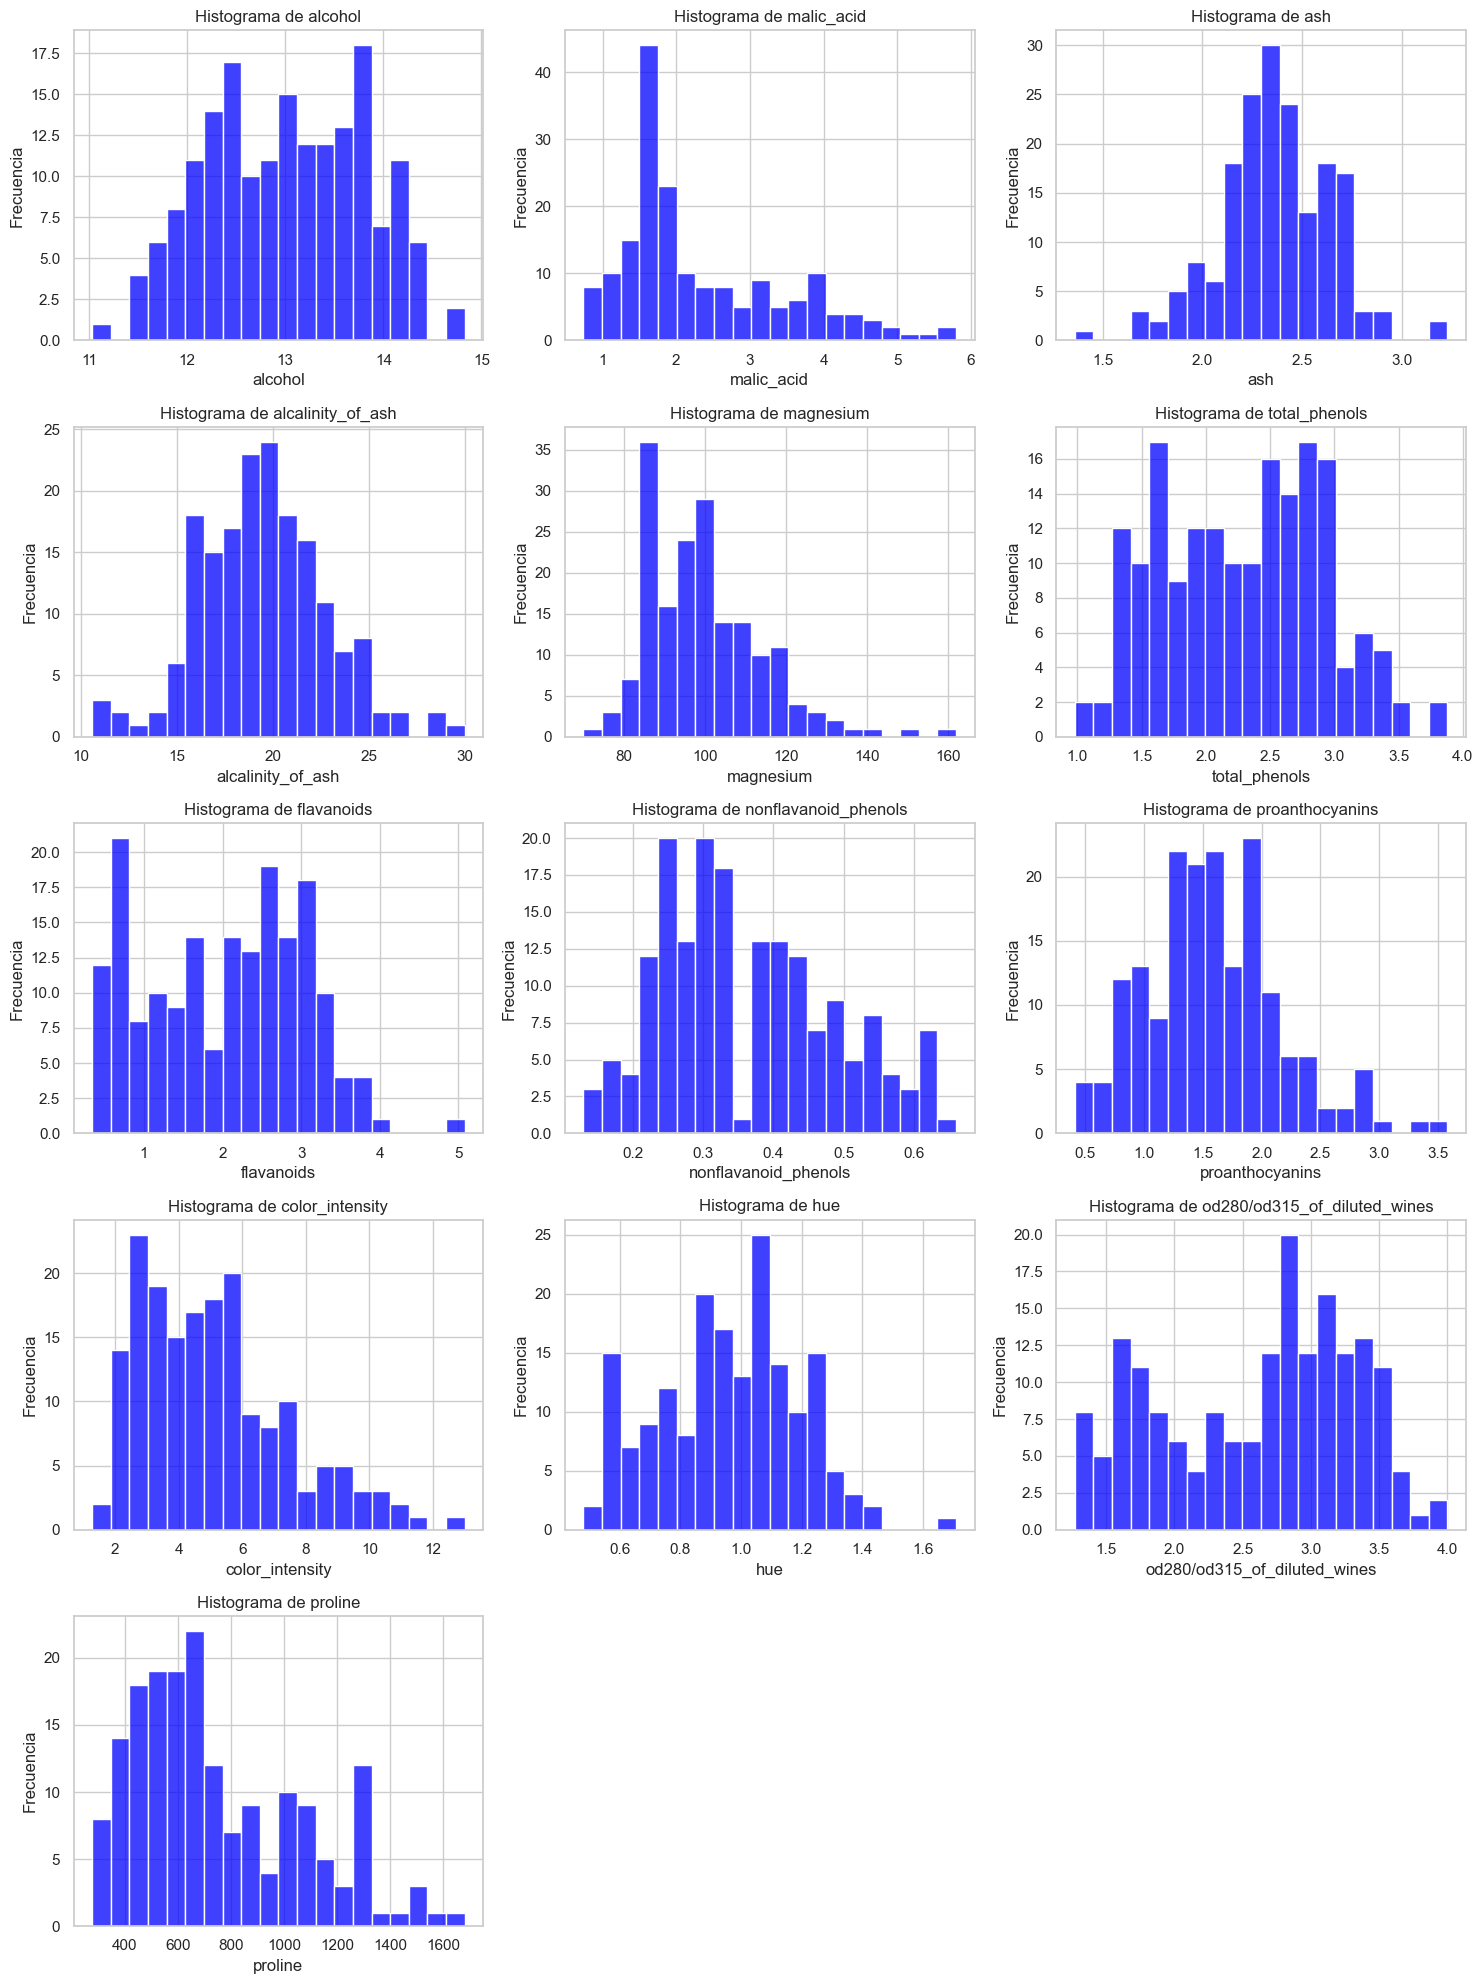

In [1217]:
import seaborn as sns

# Graficamos histogramas de las features

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")

# Crear histogramas para cada característica del dataset
def plot_histograms(dataframe):
    num_features = len(dataframe.columns)
    cols = 3  # Número de columnas en el grid
    rows = (num_features // cols) + (num_features % cols > 0)  # Calcular filas necesarias

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Tamaño del grid
    axes = axes.flatten()  # Aplanar la matriz de ejes

    for i, column in enumerate(dataframe.columns):
        sns.histplot(dataframe[column], kde=False, bins=20, ax=axes[i], color="blue")
        axes[i].set_title(f'Histograma de {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frecuencia')

    # Ocultar cualquier gráfico extra si hay menos features que subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_histograms(X)

In [1218]:
from scipy.stats import shapiro

# Creamos funcion para comprobar si las features tienen una distribución normal
def check_normality(dataframe, alpha=0.05):
    # Filtrar solo columnas numéricas
    numeric_columns = dataframe.select_dtypes(include=['number'])

    # Inicializacion de check all normal
    all_normal = True

    # Iterar por cada columna numérica y aplicar la prueba de Shapiro-Wilk
    for col in numeric_columns.columns:
        stat, p = shapiro(numeric_columns[col].dropna())  # Ignorar valores NaN
        if p <= alpha:
            # Si alguna columna no es normal, devuelve False
            print(f"Feature '{col}' no se ajusta a una distribucion normal: p-valor = {p:.5f}")
            all_normal = False

    if all_normal:
        # Si todas las columnas pasan la prueba, devuelve True
        print("Todas las columnas numéricas son normales.")

# Verificamos condicion de normalidad en las features
check_normality(X)

Feature 'alcohol' no se ajusta a una distribucion normal: p-valor = 0.02005
Feature 'malic_acid' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'ash' no se ajusta a una distribucion normal: p-valor = 0.03868
Feature 'magnesium' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'total_phenols' no se ajusta a una distribucion normal: p-valor = 0.00440
Feature 'flavanoids' no se ajusta a una distribucion normal: p-valor = 0.00002
Feature 'nonflavanoid_phenols' no se ajusta a una distribucion normal: p-valor = 0.00011
Feature 'proanthocyanins' no se ajusta a una distribucion normal: p-valor = 0.01445
Feature 'color_intensity' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'hue' no se ajusta a una distribucion normal: p-valor = 0.01743
Feature 'od280/od315_of_diluted_wines' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'proline' no se ajusta a una distribucion normal: p-valor = 0.00000


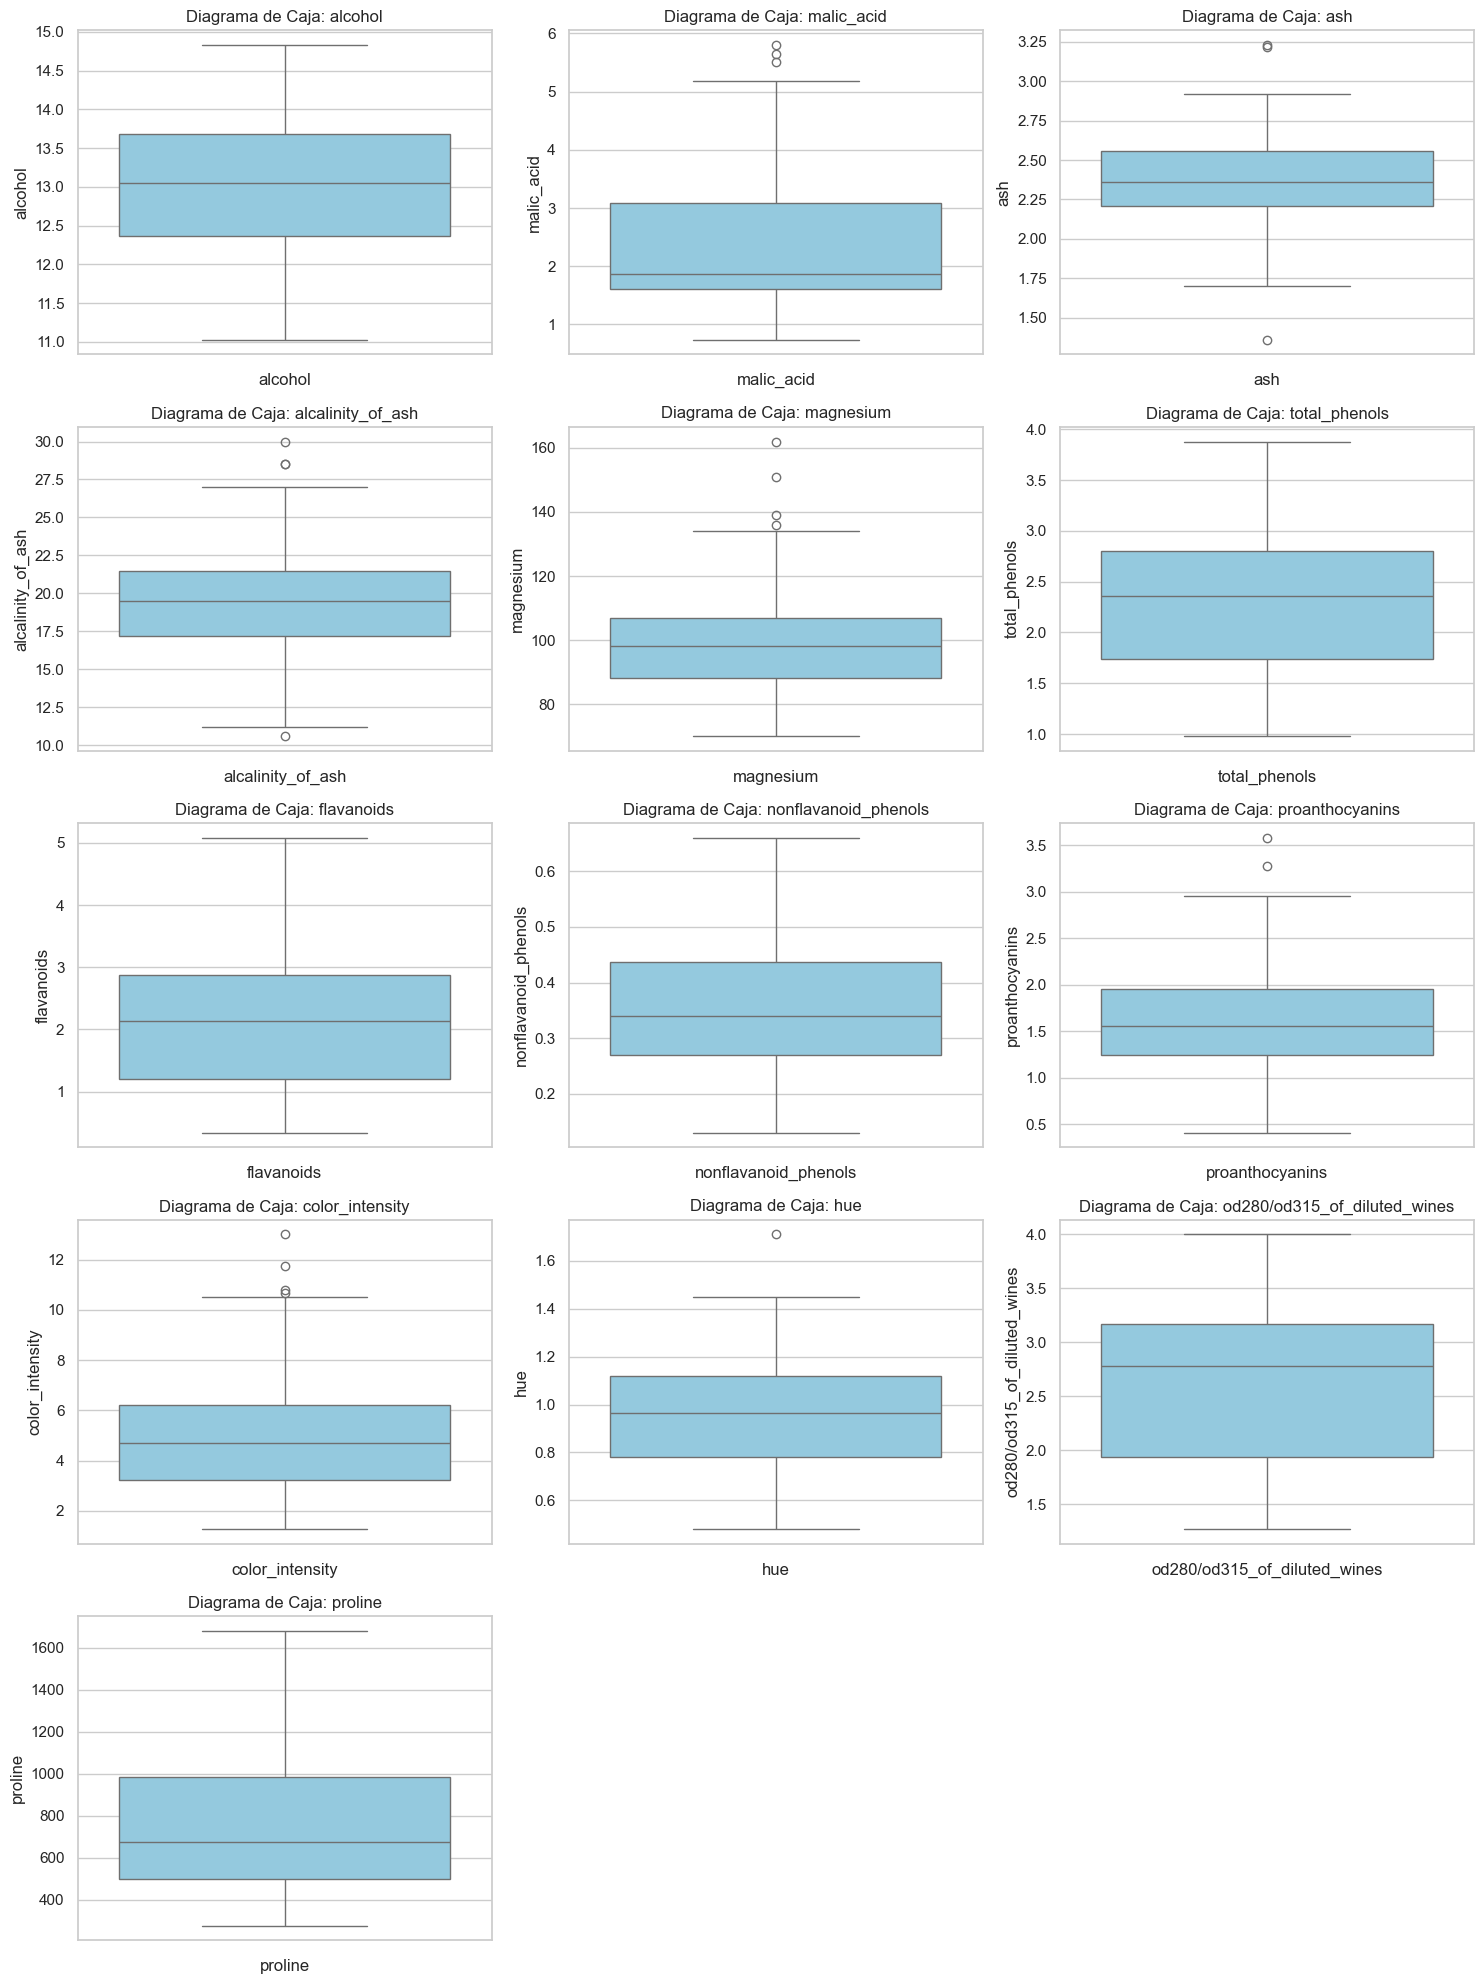

In [1219]:
# Graficamos diagramas de caja de las features

# Crear diagramas de caja para cada característica del dataset
def plot_boxplots(dataframe):
    num_features = len(dataframe.columns)
    cols = 3  # Número de columnas en el grid
    rows = (num_features // cols) + (num_features % cols > 0)  # Calcular filas necesarias

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Tamaño del grid
    axes = axes.flatten()  # Aplanar la matriz de ejes

    for i, column in enumerate(dataframe.columns):
        sns.boxplot(data=dataframe[column], ax=axes[i], color="skyblue")
        axes[i].set_title(f'Diagrama de Caja: {column}')
        axes[i].set_xlabel(column)

    # Ocultar cualquier gráfico extra si hay menos features que subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_boxplots(X)

In [1220]:
# Definimos función para contar outliers
def count_outliers(dataframe, feature):
    # Calcular los cuartiles y el IQR
    Q1 = dataframe[feature].quantile(0.25)
    Q3 = dataframe[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)]

    # Retornar el número de outliers
    return len(outliers)

In [1221]:
# Contamos el número de outliers presente en cada feature
outliers = {}
for feature in X.columns.to_list():
    outliers[feature] = count_outliers(X, feature)

print(outliers)

{'alcohol': 0, 'malic_acid': 3, 'ash': 3, 'alcalinity_of_ash': 4, 'magnesium': 4, 'total_phenols': 0, 'flavanoids': 0, 'nonflavanoid_phenols': 0, 'proanthocyanins': 2, 'color_intensity': 4, 'hue': 1, 'od280/od315_of_diluted_wines': 0, 'proline': 0}


In [1222]:
# Contamos el número total de outliers
sum(outliers.values())

21

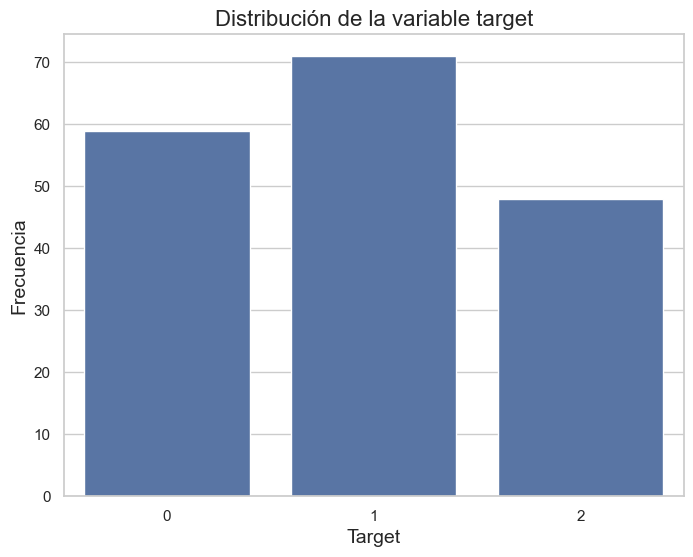

In [1223]:
# Graficamos diagrama de barras para los targets

# Crear el diagrama de barras
plt.figure(figsize=(8, 6))
sns.countplot(x=y)

# Etiquetas y título
plt.title('Distribución de la variable target', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

Conclusiones extraídas del análisis exploratorio:

- Las features presentan distintas escalas por lo que será necesario normalizar los valores para evitar que el modelo esté sesgado.
- Las features no se ajustan a una distribución normal y por lo tanto, no se puede emplear StandardScaler como método de normalización.
- Se observa la presencia de 21 valores outliers entre todas las features. MinMaxScaler no es recomendado en este caso debido a que los valores se pueden comprimir en un rango muy pequeño, lo que puede empeorar el rendimiento del modelo. Se recomienda usar RobusScaler ya que es más resistente a outliers.
- Existe cierto desbalanceo en las 3 clases de la variable target. Consecuentemente, se debe considerar este desbalanceo en la creación de los conjuntos TRAIN y TEST.

<u>Paso 3: TRANSFORMACIÓN Y LIMPIEZA DE LOS DATOS

In [1226]:
# Generamos los conjuntos TRAIN y TEST teniendo en cuenta el desbalanceo de la variable target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [1227]:
from sklearn.preprocessing import RobustScaler

# Normalizamos los datos mediante el método RobustScaler

# Instanciamos el scaler
scaler = RobustScaler()

# Entrenamos el scaler con el conjunto TRAIN y normalizamos el conjunto TRAIN
X_train_scaled = scaler.fit_transform(X_train)

# Normalizamos el conjunto TEST
X_test_scaled = scaler.transform(X_test)

In [1228]:
from sklearn.decomposition import PCA

# Realizamos reducción de dimensiones mediante PCA
# Reducimos a 2 dimensiones para poder visualizar posteriormente las fronteras de decisiones del modelo KNN

# Instanciamos el reductor de dimensiones
pca = PCA(n_components=2)

# Entrenamos el reductor con el conjunto TRAIN y aplicamos PCA al conjunto TRAIN
X_train_scaled_pca = pca.fit_transform(X_train_scaled)

# Aplicamos PCA al conjunto TEST
X_test_scaled_pca = pca.transform(X_test_scaled)

Respecto a los outliers, por ahora, se decide no eliminarlos. Esta decisión se debe tomar como un hiperparámetro para el modelo.

**Instancia un modelo KNN y entrena este modelo con el conjunto de entrenamiento**

In [1231]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos modelo KNN con n_neighbors = 10 y weights='uniform'
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

# Entrenamos el modelo con conjunto TRAIN
knn.fit(X_train_scaled_pca, y_train)

KNeighborsClassifier(n_neighbors=10)

**Evalúa la precisión del modelo tanto en el conjunto de entrenamiento como en el de prueba**

In [1233]:
# Precisión del modelo con conjunto TRAIN
knn.score(X_train_scaled_pca, y_train)

0.9663865546218487

In [1234]:
# Precisión del modelo con conjunto TEST
knn.score(X_test_scaled_pca, y_test)

0.9491525423728814

Interpretación de resultados:

El método `score` devuelve la exactitud (accuracy) del modelo, que es el porcentaje de predicciones correctas sobre el total de muestras en el conjunto de datos.
$$
Exactitud=\frac{Número\ de\ predicciones\ correctas}{Número\ total\ de\ muestras}
$$

Se ha obtenido una exactitud del 97% y 95% para los conjuntos TRAIN y TEST, respectivamente. La reducción de la exactitud en el conjunto TEST en comparación con el conjunto TRAIN suele ocurrir normalmente ya que el modelo trata de predecir una muestra con una combinación de features no vistas durante la fase de entrenamiento.

**Utiliza una métrica de evaluación adecuada para comparar el rendimiento en ambos conjuntos**

In [1237]:
from sklearn.metrics import precision_score, recall_score, classification_report

# Evaluación del clasificador multiclase

# Instanciamos variables con valores objetivo y predicciones realizadas por el modelo
y_true = y_test
y_pred = knn.predict(X_test_scaled_pca)

# Micro-average
micro_precision = precision_score(y_true, y_pred, average='micro')
micro_recall = recall_score(y_true, y_pred, average='micro')

# Macro-average
macro_precision = precision_score(y_true, y_pred, average='macro')
macro_recall = recall_score(y_true, y_pred, average='macro')

# Resultados
print("Micro-average Precision:", micro_precision)
print("Micro-average Recall:", micro_recall)
print("Macro-average Precision:", macro_precision)
print("Macro-average Recall:", macro_recall)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

Micro-average Precision: 0.9491525423728814
Micro-average Recall: 0.9491525423728814
Macro-average Precision: 0.9555555555555556
Macro-average Recall: 0.9480072463768116

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.92      0.96      0.94        23
           2       1.00      0.94      0.97        16

    accuracy                           0.95        59
   macro avg       0.96      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



Interpretación de resultados:

- Métrica Micro-average:
    - Precision y recall del 95%. Esto refleja que el modelo tiene un buen rendimiento en términos generales.

- Métrica Macro-average:
    - Precision y recall del 96% y 95%. Esto sugiere que el modelo trata a las clases de manera similar y no privilegia ninguna en particular.

- Métricas Classification Report:
    - Los valores de precision, recall y f1-score son consistentes en las 3 clases, sugiriendo que el modelo identifica correctamente con un buen balance.
    - La métrica "macro avg" promedia los valores de cada clase sin tener en cuenta la proporción en el conjunto. Por otro lado, la métrica "weighted avg" sí tiene en cuenta el peso de cada clase en el conjunto. Se observa los valores de "macro avg" son muy ligeramente superior a los de "weighted avg", indicando que las clases minoritarios no afectan al desempeño del modelo.

**Analiza los resultados obtenidos (p.e. dibujar y plotear boundary decisions...) y extraer conclusiones pertinentes, especialmente en caso de encontrar diferencias significativas en el rendimiento entre los conjuntos de entrenamiento y prueba**

In [1240]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

# Creamos funciones para graficar límites de decisión
def make_meshgrid(
    data: np.ndarray,
    step: float = 0.05,
    border: float = 0.5,
):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(["red", "blue", "yellow"])
    light_colors = ListedColormap(["lightcoral", "lightblue", "lightyellow"])

    # fit model
    estimator.fit(train_data, train_labels)

    # set figure size
    fig = plt.figure(figsize=(16, 6))
    fig.suptitle(estimator)

    # plot decision surface on the train data
    plt.subplot(1, 2, 1)
    xx, yy = make_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    acc = accuracy_score(train_labels, estimator.predict(train_data))
    plt.title(f"Train data, accuracy={acc:.2f}")

    # plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    acc = accuracy_score(test_labels, estimator.predict(test_data))
    plt.title(f"Test data, accuracy={acc:.2f}")

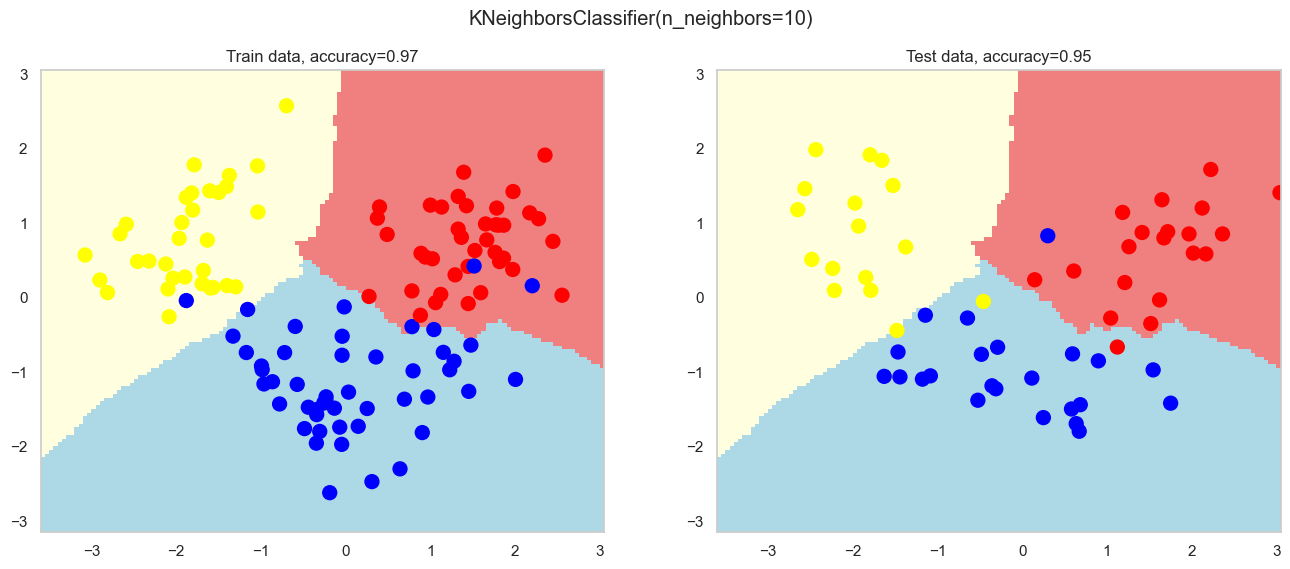

In [1241]:
# Graficamos límites de decisión para conjuntos TRAIN y TEST
plot_decision_surface(knn, X_train_scaled_pca, y_train, X_test_scaled_pca, y_test)

Interpretación de resultados:

- No se observa overfitting o ruido local en los límites de decisión. Esto sugiere que la elección de hiperparámetros para el modelo ha sido correcta.

- En el conjunto TRAIN, se aprecia 4 muestras pertenecientes a la clase 2 de vinos que el modelo ha predicho incorrectamente. La exactitud del modelo para este conjunto es del 97%.

- En el conjunto TEST, se aprecia 2 muestras de la clase 1, 1 muestra de la clse 2 y 1 muestra de la clase 3 que el modelo ha predicho incorrectamente. La exactitud del modelo para este conjunto es del 95%. Como se ha mencionado anteriormente, la reducción de la exactitud en el conjunto TEST en comparación con el conjunto TRAIN suele ocurrir normalmente ya que el modelo trata de predecir una muestra con una combinación de features no vistas durante la fase de entrenamiento. Sin embargo, en este caso la reducción en la exactitud es únicamente del 2%, reforzando la conclusión de que el modelo generaliza correctamente.

Como conclusión final, viendo las métricas de evaluación del modelo en el anterior apartado, podemos afirmar que el modelo KNN creado es buen predictor de la clase de vino dentro de las condiciones de contorno establecidas por las muestras del dataset `wine`. 

##### Evaluación del Impacto de Parámetros en un Modelo KNN con Scikit-Learn

- Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para un modelo de clasificación KNN
- Realiza cualquier pre-procesamiento necesario en el dataset
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split.
- Elige al menos dos parámetros importantes del modelo KNN para evaluar. Algunas sugerencias pueden ser el número de vecinos (n_neighbors) y el tipo de ponderación de los vecinos (weights)
- Para cada parámetro, entrena múltiples modelos variando los valores de dicho parámetro mientras mantienes constantes los otros
- Utiliza una métrica de rendimiento adecuada, como la precisión, para evaluar el impacto de los distintos valores de cada parámetro en el rendimiento del modelo.
- Realiza este proceso para cada parámetro de forma independiente y registra los resultados
- Determina qué combinaciones de parámetros ofrecen los mejores resultados y saca conclusiones sobre la importancia de cada parámetro evaluado

**Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para un modelo de clasificación KNN**

In [1245]:
from sklearn.datasets import load_breast_cancer

# Descargamos Dataset "load_breast_cancer"
breast_cancer_dataset = load_breast_cancer()

In [1246]:
# Mostramos por pantalla la descripción del dataset
print(breast_cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [1247]:
# Guardamos las features en formato DataFrame (matriz de diseño)
X = pd.DataFrame(data=breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

In [1248]:
# Guardamos los targets en la variable en formato Serie
y = pd.Series(breast_cancer_dataset.target, name='cancer_type_number')

# Guardamos los targets en formato string
y_labels = y.map(lambda x: breast_cancer_dataset.target_names[x])
y_labels.name = 'cancer_type_label'

In [1249]:
# Guardamos las features y los target en un DataFrame
df = pd.concat([X, y, y_labels], axis=1)

# Mostramos las 5 primeras filas del DataFrame que contiene las features y el target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type_number,cancer_type_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


**Realiza cualquier pre-procesamiento necesario en el dataset**

**Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split**

<u>Paso 1: PRESENTACIÓN DEL DATASET

In [1252]:
# Mostramos la estructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [1253]:
# Mostramos dimensiones del dataset
df.shape

(569, 32)

In [1254]:
# Verificamos presencia de valores NaN en el dataset
if df.isnull().sum().sum() == 0:
    print('No existen valores NaN en el dataset.')
else:
    print(f'Existen {df.isnull().sum().sum()} valores NaN en el dataset.')

No existen valores NaN en el dataset.


Presentación del dataset:

- El datas `breast_cancer` registra características de distintas muestras dcáncer medidas.
- El dataset contiene un la media, desviación estándar y peor caso de 569 características como el radio, textura, perímetro, área, entre otras. Dando lugar a 30 features.
- La variable target del dataset se trata de una variable categórica numérica. Cuando toma el valor de 0 significa que el cáncer es maligno y cuando es 1, benigno.
- El dataset no presenta valores NaN

<u>Paso 2: ANÁLISIS EXPLORATORIO DE LOS DATOS

In [1257]:
# Mostramos los principales estadísticos de las variables numéricas
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type_number
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


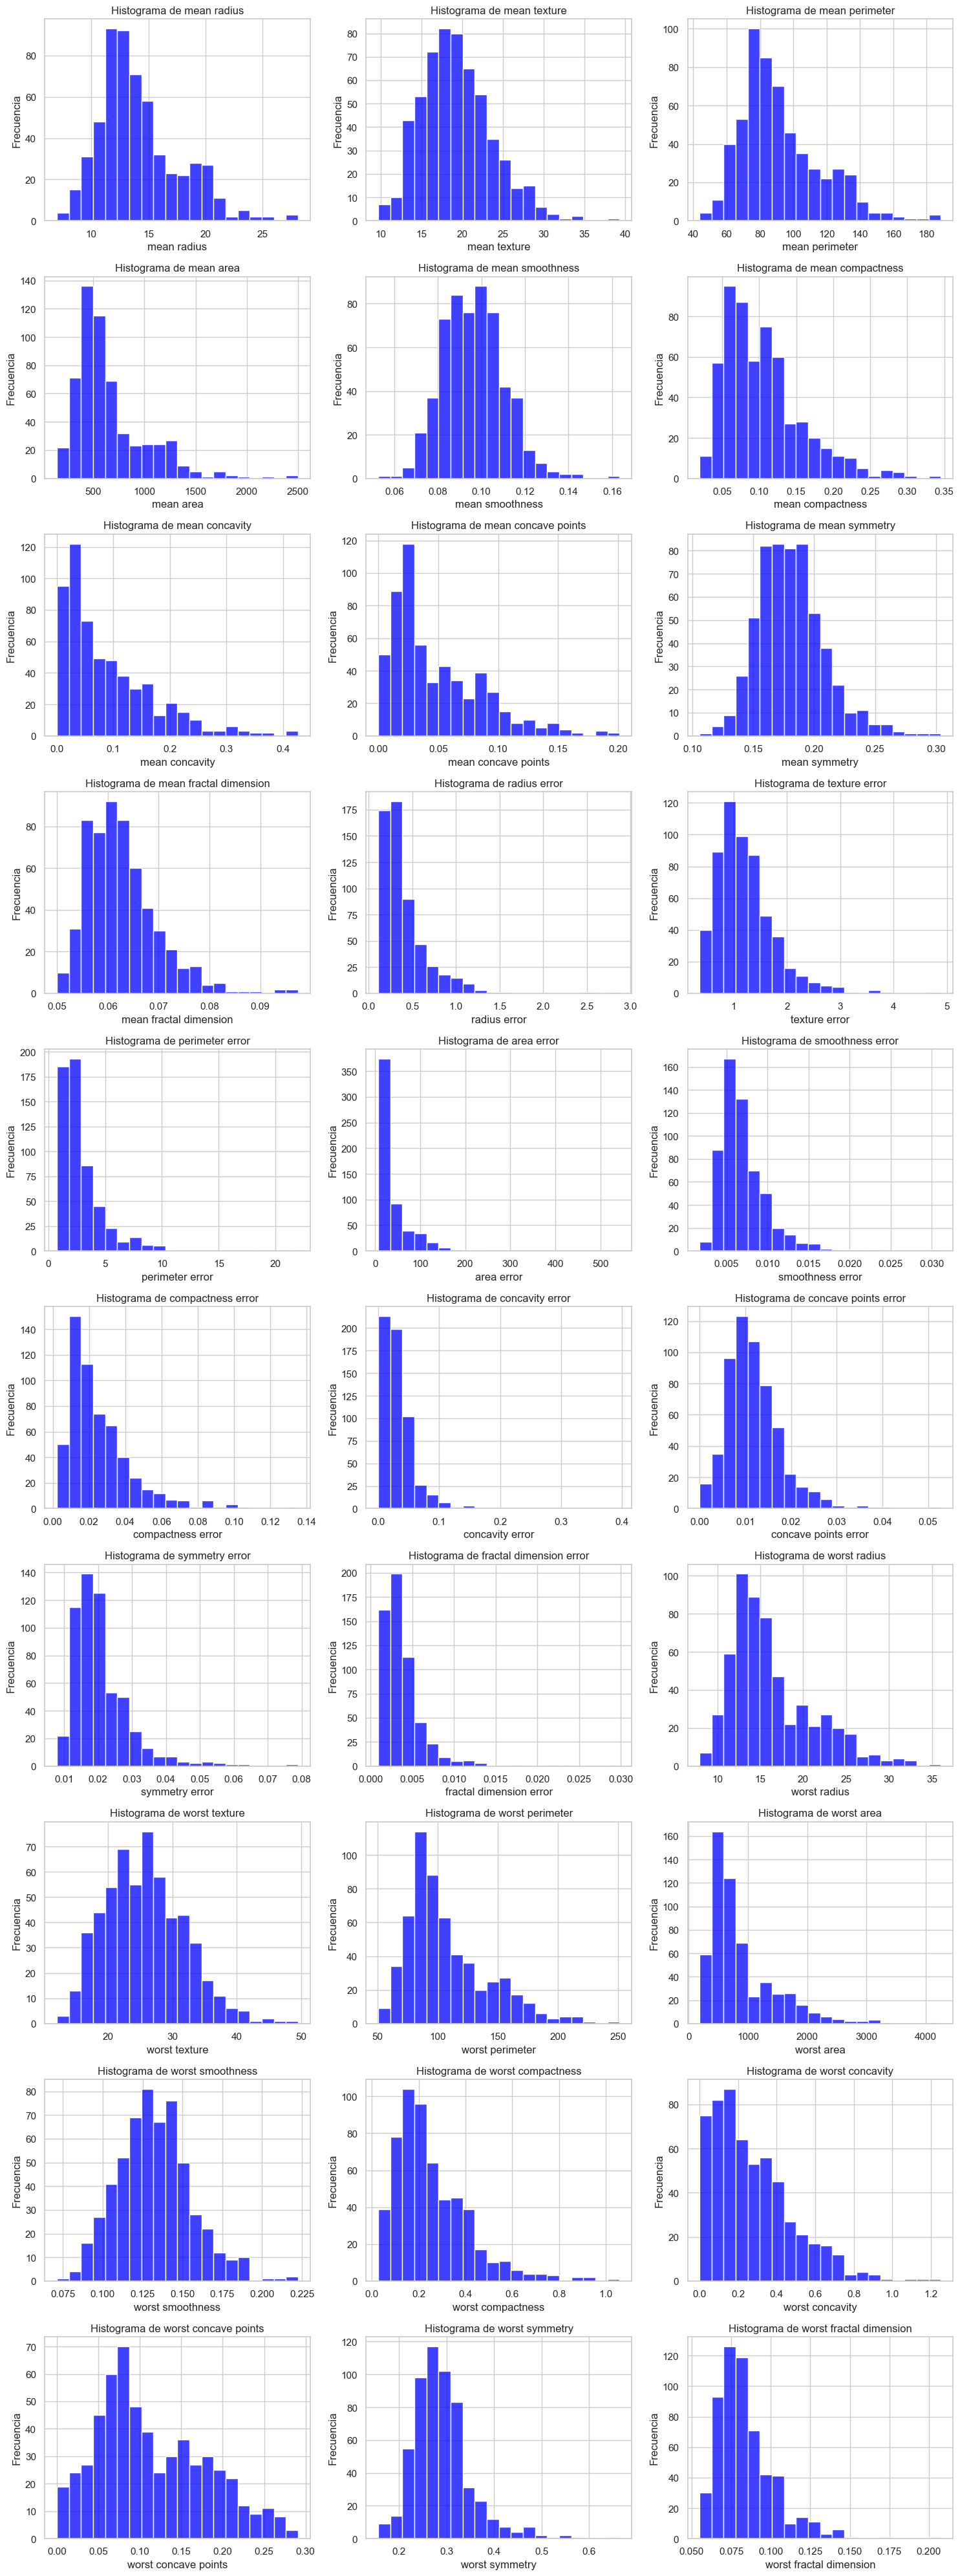

In [1258]:
import seaborn as sns

# Graficamos histogramas de las features
plot_histograms(X)

In [1259]:
# Verificamos si las features se ajustan a una distribución normal
check_normality(X)

Feature 'mean radius' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'mean texture' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'mean perimeter' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'mean area' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'mean smoothness' no se ajusta a una distribucion normal: p-valor = 0.00009
Feature 'mean compactness' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'mean concavity' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'mean concave points' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'mean symmetry' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'mean fractal dimension' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'radius error' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'texture error' no se ajusta a una distribucion normal: p-valor = 0.00000
Fe

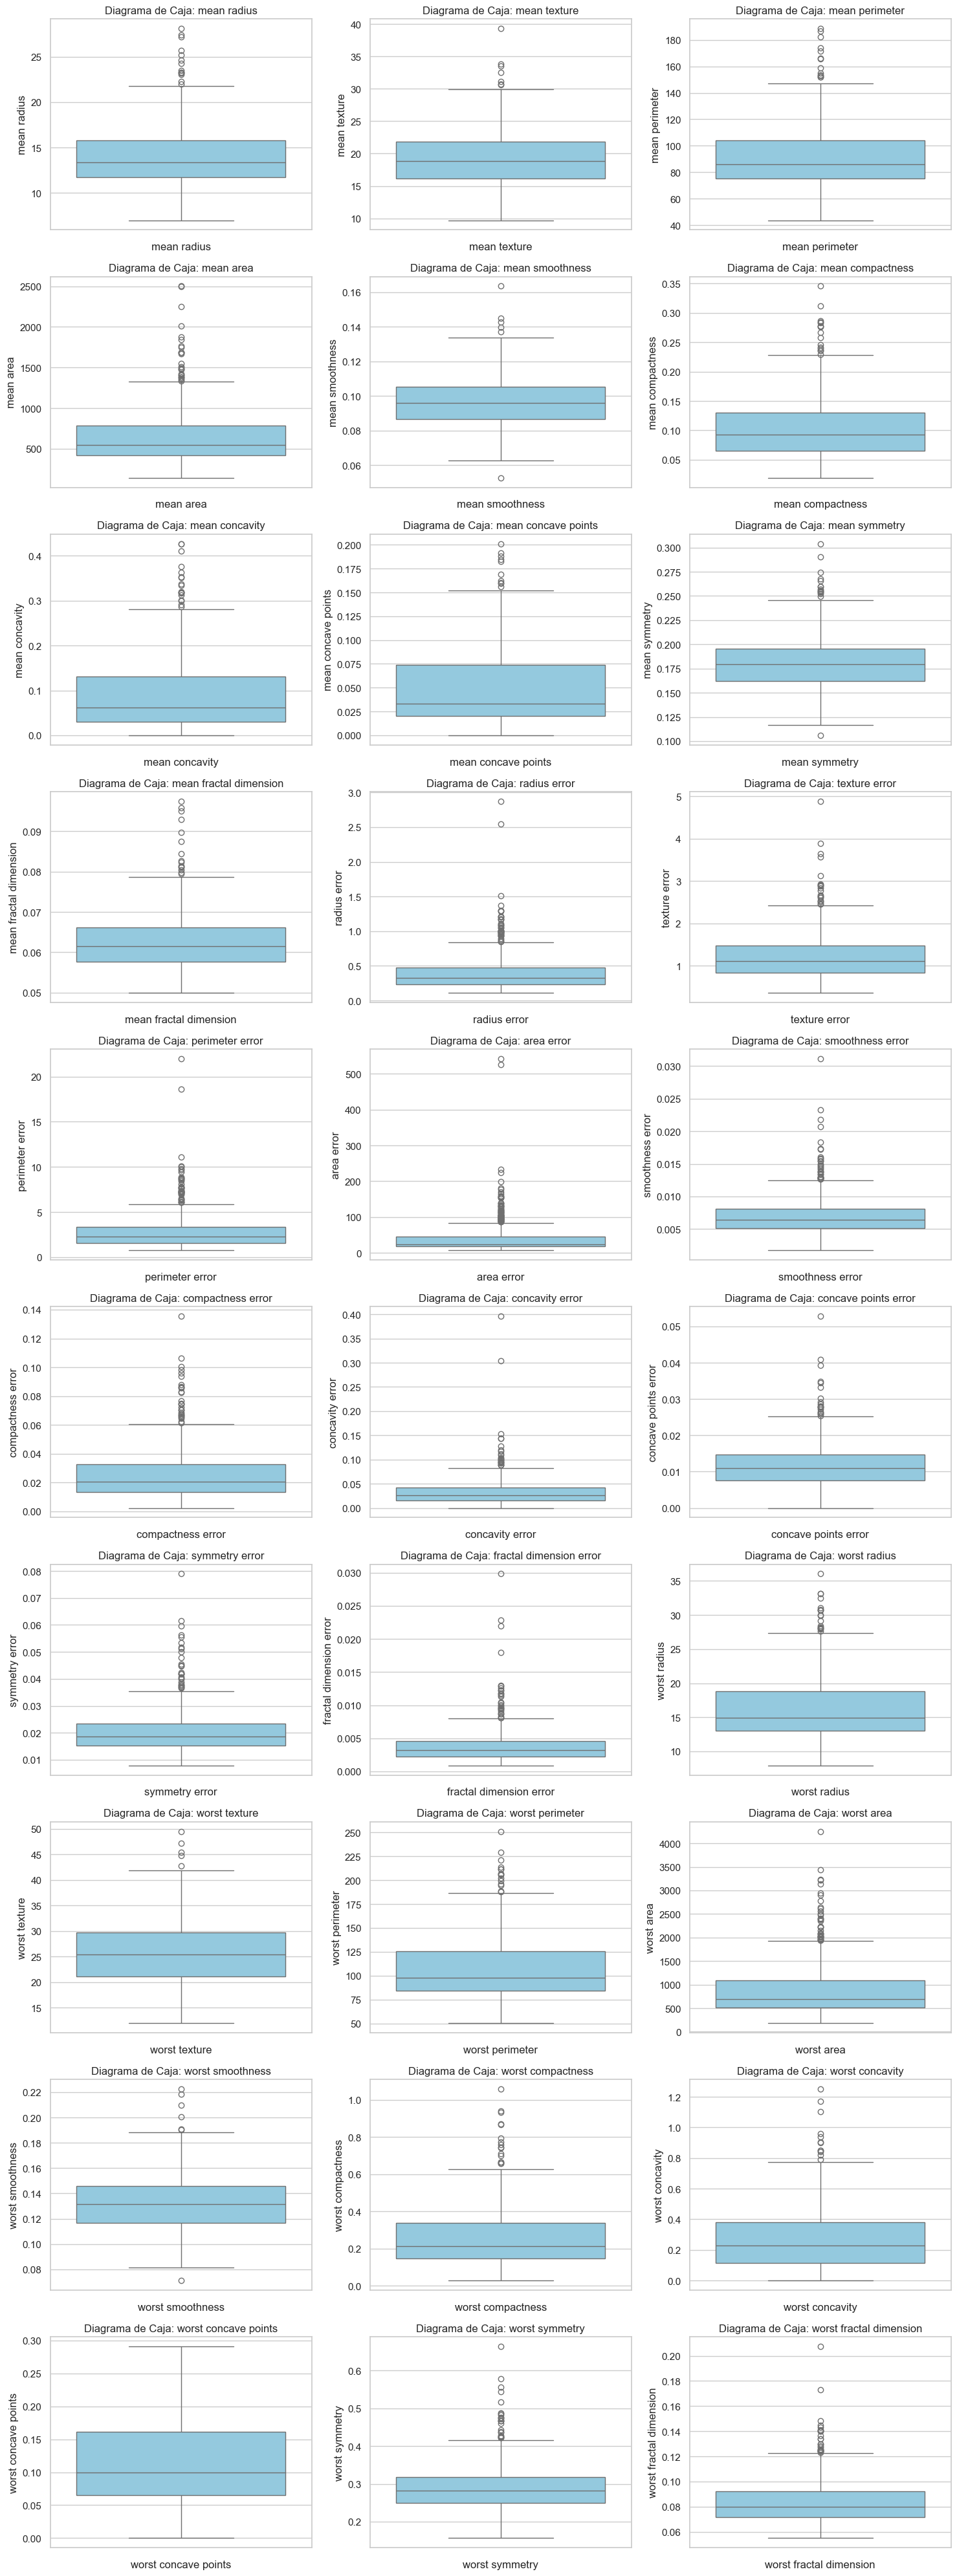

In [1260]:
# Graficamos diagramas de caja de las features

# Crear diagramas de caja para cada característica del dataset
plot_boxplots(X)

In [1261]:
# Contamos el número de outliers presente en cada feature
outliers = {}
for feature in X.columns.to_list():
    outliers[feature] = count_outliers(X, feature)

print(outliers)

{'mean radius': 14, 'mean texture': 7, 'mean perimeter': 13, 'mean area': 25, 'mean smoothness': 6, 'mean compactness': 16, 'mean concavity': 18, 'mean concave points': 10, 'mean symmetry': 15, 'mean fractal dimension': 15, 'radius error': 38, 'texture error': 20, 'perimeter error': 38, 'area error': 65, 'smoothness error': 30, 'compactness error': 28, 'concavity error': 22, 'concave points error': 19, 'symmetry error': 27, 'fractal dimension error': 28, 'worst radius': 17, 'worst texture': 5, 'worst perimeter': 15, 'worst area': 35, 'worst smoothness': 7, 'worst compactness': 16, 'worst concavity': 12, 'worst concave points': 0, 'worst symmetry': 23, 'worst fractal dimension': 24}


In [1262]:
# Contamos el número total de outliers
sum(outliers.values())

608

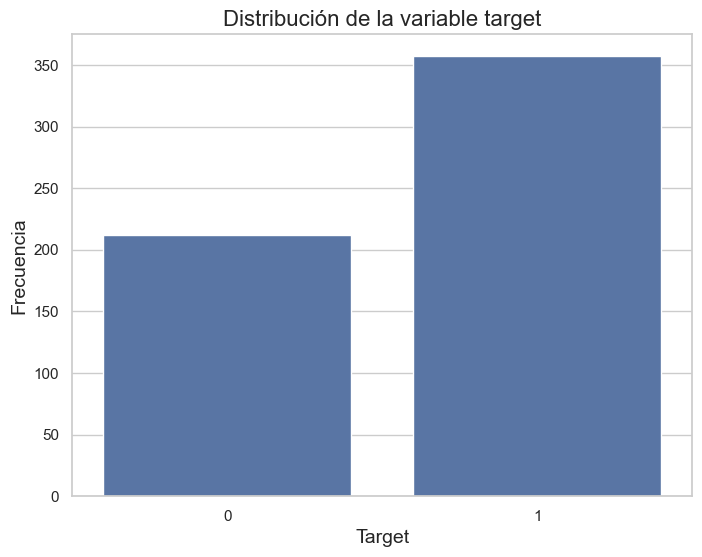

In [1263]:
# Graficamos diagrama de barras para los targets

# Crear el diagrama de barras
plt.figure(figsize=(8, 6))
sns.countplot(x=y)

# Etiquetas y título
plt.title('Distribución de la variable target', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

Conclusiones extraídas del análisis exploratorio:

- Las features presentan distintas escalas por lo que será necesario normalizar los valores para evitar que el modelo esté sesgado.
- Las features no se ajustan a una distribución normal y por lo tanto, no se puede emplear StandardScaler como método de normalización.
- La distribución de algunas features presenta una asimetría positiva elevada. Esto sugiere la presencia de un número elevado de outliers en la zona superior del rango de valores.
- Se observa la presencia de 608 valores outliers entre todas las features. Todos ellos en la zona superior del rango de valores a excepción de 3 outliers presentes en la zona inferior del rango para las features "mean smoothness", "mean symmetry" y "worst smoothness".  MinMaxScaler no es recomendado en este caso debido a que los valores se pueden comprimir en un rango muy pequeño, lo que puede empeorar el rendimiento del modelo. Se recomienda usar RobusScaler ya que es más resistente a outliers. Se puede plantear una transformación logarítimica o basada en raíces con el propósito de disminuir el impacto de los outliers para el modelo.
- Existe desbalanceo en las 2 clases de la variable target. Consecuentemente, se debe considerar este desbalanceo en la creación de los conjuntos TRAIN y TEST.

<u>Paso 3: TRANSFORMACIÓN Y LIMPIEZA DE LOS DATOS

In [1266]:
# Generamos los conjuntos TRAIN y TEST teniendo en cuenta el desbalanceo de la variable target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [1267]:
# Tratamiento de outliers mediante transformación logarítmica
# Transformación logarítmica de las features con asimetría fuertemente positiva
# Creamos función para transformación logarítmica con skewness > 1
def log_transformation(dataframe):
    # Obtenemos features con skewness > 1
    skewed_features = dataframe.skew()[dataframe.skew() > 1].index

    # Aplicamos transformación logarítmica
    dataframe[skewed_features] = np.log1p(dataframe[skewed_features])  # log1p(x) = log(x + 1)

    return dataframe

# Realizamos tranformación logarítmica sobre los conjuntos TRAIN y TEST
X_train_skewed = log_transformation(X_train)
X_test_skewed = log_transformation(X_test)

In [1268]:
# Contamos el número de outliers en conjunto TRAIN tras realizar transformación logarítmica
outliers = {}
for feature in X_train_skewed.columns.to_list():
    outliers[feature] = count_outliers(X_train_skewed, feature)

# Contamos el número total de outliers
sum(outliers.values())

348

In [1269]:
# Contamos el número de outliers en conjunto TEST tras realizar transformación logarítmica
outliers = {}
for feature in X_test_skewed.columns.to_list():
    outliers[feature] = count_outliers(X_test_skewed, feature)

# Contamos el número total de outliers
sum(outliers.values())

70

Se observa como al aplicar la transformación logarítmica, se reduce el número de outliers presente en los conjuntos TRAIN y TEST en comparación con el dataset original.

In [1271]:
# Normalizamos los datos mediante el método RobustScaler

# Instanciamos el scaler
scaler = RobustScaler()

# Entrenamos el scaler con el conjunto TRAIN y normalizamos el conjunto TRAIN
X_train_skewed_scaled = scaler.fit_transform(X_train_skewed)

# Normalizamos el conjunto TEST
X_test_skewed_scaled = scaler.transform(X_test_skewed)

In [1272]:
from sklearn.decomposition import PCA

# Realizamos reducción de dimensiones mediante PCA
# Reducimos a 2 dimensiones para poder visualizar posteriormente las fronteras de decisiones del modelo KNN

# Instanciamos el reductor de dimensiones
pca = PCA(n_components=2)

# Entrenamos el reductor con el conjunto TRAIN y aplicamos PCA al conjunto TRAIN
X_train_skewed_scaled_pca = pca.fit_transform(X_train_skewed_scaled)

# Aplicamos PCA al conjunto TEST
X_test_skewed_scaled_pca = pca.transform(X_test_skewed_scaled)

**Elige al menos dos parámetros importantes del modelo KNN para evaluar. Algunas sugerencias pueden ser el número de vecinos (n_neighbors) y el tipo de ponderación de los vecinos (weights)**

**Para cada parámetro, entrena múltiples modelos variando los valores de dicho parámetro mientras mantienes constantes los otros**

**Utiliza una métrica de rendimiento adecuada, como la precisión, para evaluar el impacto de los distintos valores de cada parámetro en el rendimiento del modelo**

**Realiza este proceso para cada parámetro de forma independiente y registra los resultados**

**Determina qué combinaciones de parámetros ofrecen los mejores resultados y saca conclusiones sobre la importancia de cada parámetro evaluado**

In [1274]:
# Listamos varios valores de los hiperparámetros n_neighbors y weights para crear varios modelos y poder compararlos
n_neighbors_grid = np.arange(1, 21) # N vecinos desde 1 hasta 20
weights = ['uniform', 'distance'] # En uniform la distancia de todos los vecinos tiene la misma influencia. En distance influyen más los cercanos


separator = "--------------------------------------"
print('*** Starting K-neighbours classifier')
print(separator)
print("n_neighbors  | Weight | Score")
print(separator)

# Inicializamos variable para almacenar score del mejor modelo
bestScore = 0.0

# Inicializamos diccionario para guardar resultados obtenidos
score_dict = {'uniform': [], 'distance':[]}

for n_neighbors in n_neighbors_grid:
    for weight in weights:

        # Instanciamos modelo con unos n_neighbors y weight dados
        knmodel = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weight)

        # Entrenamos modelo
        knmodel.fit(X_train_skewed_scaled_pca, y_train) 

        # Obtenemos el accuracy del modelo
        currentScore = knmodel.score(X_test_skewed_scaled_pca, y_test)

        # Guardamos resultados para graficarlos posteriormente
        if weight == 'uniform':
            score_dict['uniform'].append(currentScore)
        else:
            score_dict['distance'].append(currentScore)
    
        print(f"{n_neighbors} | {weight} | {currentScore}")

        # Guardamos el mejor modelo
        if (currentScore > bestScore):
            bestScore = currentScore
            bestK = n_neighbors
            bestWeight = weight

*** Starting K-neighbours classifier
--------------------------------------
n_neighbors  | Weight | Score
--------------------------------------
1 | uniform | 0.8421052631578947
1 | distance | 0.8421052631578947
2 | uniform | 0.868421052631579
2 | distance | 0.8421052631578947
3 | uniform | 0.8596491228070176
3 | distance | 0.8596491228070176
4 | uniform | 0.8859649122807017
4 | distance | 0.8508771929824561
5 | uniform | 0.868421052631579
5 | distance | 0.8596491228070176
6 | uniform | 0.868421052631579
6 | distance | 0.8508771929824561
7 | uniform | 0.868421052631579
7 | distance | 0.8596491228070176
8 | uniform | 0.868421052631579
8 | distance | 0.8508771929824561
9 | uniform | 0.8508771929824561
9 | distance | 0.8508771929824561
10 | uniform | 0.8596491228070176
10 | distance | 0.8421052631578947
11 | uniform | 0.8596491228070176
11 | distance | 0.8596491228070176
12 | uniform | 0.8771929824561403
12 | distance | 0.8508771929824561
13 | uniform | 0.8596491228070176
13 | distance | 

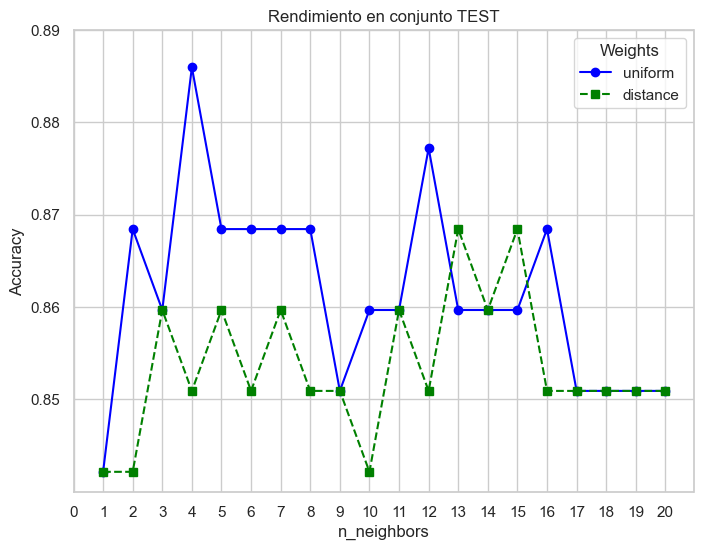

In [1357]:
# Graficamos el accuracy obtenido para cada modelo creado
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_grid, score_dict['uniform'], label='uniform', color='blue', linestyle='-', marker='o')
plt.plot(n_neighbors_grid, score_dict['distance'], label='distance', color='green', linestyle='--', marker='s')

# Añadir título y etiquetas
plt.title('Rendimiento en conjunto TEST')
plt.xlabel("n_neighbors", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Modificamos escalas
plt.xticks(np.arange(0,21))
plt.yticks(np.arange(0.85,0.89,0.01))

# Añadir leyenda
plt.legend(title='Weights')

# Mostrar el gráfico
plt.grid(True)
plt.show()

En la gráfica se puede observar como el modelo con mayor accuracy tiene los siguientes hiperparámetros:

- Número de vecinos: `n_neighbors=4`
- Función de pesos: `weights='uniform'`

In [141]:
# Imprimimos por pantalla los mejor hiperparámetros encontrados para el modelo
print("These are the best hyperparameters for the model:")
print("n_neighbors  | Weight | Score")
print(f"{bestK} | {bestWeight} | {bestScore}")

These are the best hyperparameters for the model:
n_neighbors  | Weight | Score
4 | uniform | 0.8859649122807017


In [142]:
# Instanciamos mejor modelo KNN obtenido
bestKnmodel = KNeighborsClassifier(n_neighbors = bestK, weights = bestWeight)

# Entrenamos mejor modelo obtenido con conjunto TRAIN
bestKnmodel.fit(X_train_skewed_scaled_pca, y_train) 

KNeighborsClassifier(n_neighbors=4)

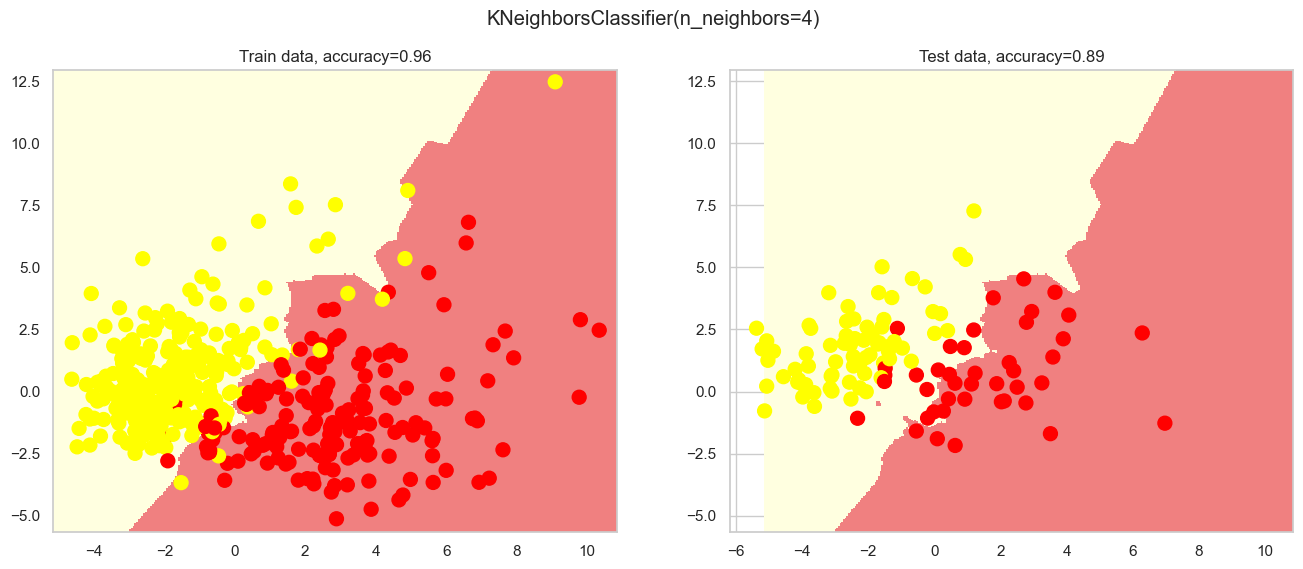

In [143]:
# Graficamos límites de decisión para conjuntos TRAIN y TEST del mejor modelo obtenido
plot_decision_surface(bestKnmodel, X_train_skewed_scaled_pca, y_train, X_test_skewed_scaled_pca, y_test)

Interpretación de resultados:

- Tanto la evidencia gráfica como numérica muestran que el mejor modelo obtenido es aquel con hiperparámetros de número de vecinos igual a 4 y función de pesos tipo uniforme. Dicho modelo presenta un accuracy del 89% para el conjunto TEST.

- Dado que el objetivo del modelo es predecir un cáncer de mama, en un escenario realista se debería ajustar el modelo para evitar la presencia de falsos negativos. Es decir, se debe modificar el límite de decisión para que siempre se detecte como positivo aquellos tumores malignos (puntos de color rojo) a costa de aumentar los falsos positivos.

- Analizando el límite de decisión, se observa algunas zonas con ruido local, sugiriendo que el modelo puede presentar un ligero overfitting. Una posible solución podría ser reducir el número de features mediante técnicas de feature selection dado que el número total de features considerado en el dataset en elevado (30 features). Otra posible solución podría ser escoger uno de los modelos creados con función de peso basada en distancia a costa de reducir algo el accuracy del modelo.

- Conclusiones extraídas del accuracy obtenido tras variar los hiperparámetros:
    - No se observa una tendencia alcista o bajista al variar el número de vecinos manteniendo constante la función de pesos.
    -  El accuracy obtenido para la función de pesos uniforme oscila entre 0.85 y 0.89. Por otro lado, el accuracy para la función de pesos basada en distancia ocila entre 0.85 y 0.87. Este resultado sugiere que la distribución de pesos basada en distancia es menos sensible a la variación en el número de vecinos en comparación con la función de pesos uniforme.

### EJERCICIO 2

##### Evaluación de la Influencia de la Normalización en Modelos de Regresión con Scikit-Learn

- Elige y carga un dataset de regresión proporcionado por Scikit-Learn
- Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba
- Elige un modelo de regresión para la evaluación. Por ejemplo, puedes elegir la Regresión Lineal o la Regresión de Ridge
- Estos modelos son representativos y permiten evaluar cómo la normalización influye en diferentes enfoques de regresión (Influye más con Ridge)
- Selecciona al menos dos métodos de normalización, como la normalización Min-Max y la estandarización StandardScaler
- Aplica cada método de normalización por separado al conjunto de entrenamiento y ajusta el conjunto de prueba de manera correspondiente
- Para cada versión normalizada del conjunto de entrenamiento, entrena ambos modelos de regresión seleccionados
- Mantén constantes los demás parámetros del modelo para cada tipo de normalización para asegurar una comparación justa
- Utiliza métricas de rendimiento adecuadas para la regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²), para evaluar cada modelo en el conjunto de prueba
- Compara el rendimiento de los modelos con diferentes métodos de normalización
- Basándote en los resultados, concluye sobre la importancia de la normalización en los modelos de regresión seleccionados y su influencia en la precisión del modelo

**Elige y carga un dataset de regresión proporcionado por Scikit-Learn**

In [148]:
from sklearn.datasets import load_diabetes

# Descargamos Dataset "Diabetes dataset"
diabetes_dataset = load_diabetes(scaled=False)

In [149]:
# Mostramos por pantalla la descripción del dataset
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [150]:
# Guardamos las features en formato DataFrame (matriz de diseño)
X = pd.DataFrame(data=diabetes_dataset.data, columns=diabetes_dataset.feature_names)

In [151]:
# Guardamos los targets en la variable en formato Serie
y = pd.Series(diabetes_dataset.target, name='target')

In [152]:
# Guardamos las features y los target en un DataFrame
df = pd.concat([X, y], axis=1)

# Mostramos las 5 primeras filas del DataFrame que contiene las features y el target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


PRE-PROCESAMIENTO DE LOS DATOS

<u>Paso 1: PRESENTACIÓN DEL DATASET

In [154]:
# Mostramos la estructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [155]:
# Mostramos dimensiones del dataset
df.shape

(442, 11)

In [156]:
# Verificamos presencia de valores NaN en el dataset
if df.isnull().sum().sum() == 0:
    print('No existen valores NaN en el dataset.')
else:
    print(f'Existen {df.isnull().sum().sum()} valores NaN en el dataset.')

No existen valores NaN en el dataset.


Presentación del dataset:

- El dataset `diabetes` registra 10 características de distintas muestras de pacientes para evaluar el estado de la diabetes.
- El dataset contiene un total de 442 muestras de distintos pacientes y las siguientes 10 características:
    - `age`: edad en años
    - `sex`: sexo
    - `bmi`: índice de masa corporal
    - `bp`: presión arterial promedio
    - `s1`: tc, colesterol sérico total
    - `s2`: ldl, lipoproteínas de baja densidad
    - `s3`: hdl, lipoproteínas de alta densidad
    - `s4`: tch, colesterol total / HDL
    - `s5`: ltg, posiblemente logaritmo del nivel de triglicéridos séricos
    - `s6`: glu, nivel de azúcar en la sangre
- Todas las features son variables numéricas tipo float
- La variable target del dataset se trata de una numérica continua e indica la evolución de la diabetes tras un año.
- El dataset no presenta valores NaN
- Al importar el dataset se ha pasado el parámetro `scaled=False` para evitar que los valores de las features vengan escalados (el ejercicio pide posteriormente realizar el escalado mediante distintas técnicas).

<u>Paso 2: ANÁLISIS EXPLORATORIO DE LOS DATOS

In [159]:
# Mostramos los principales estadísticos de las variables numéricas
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


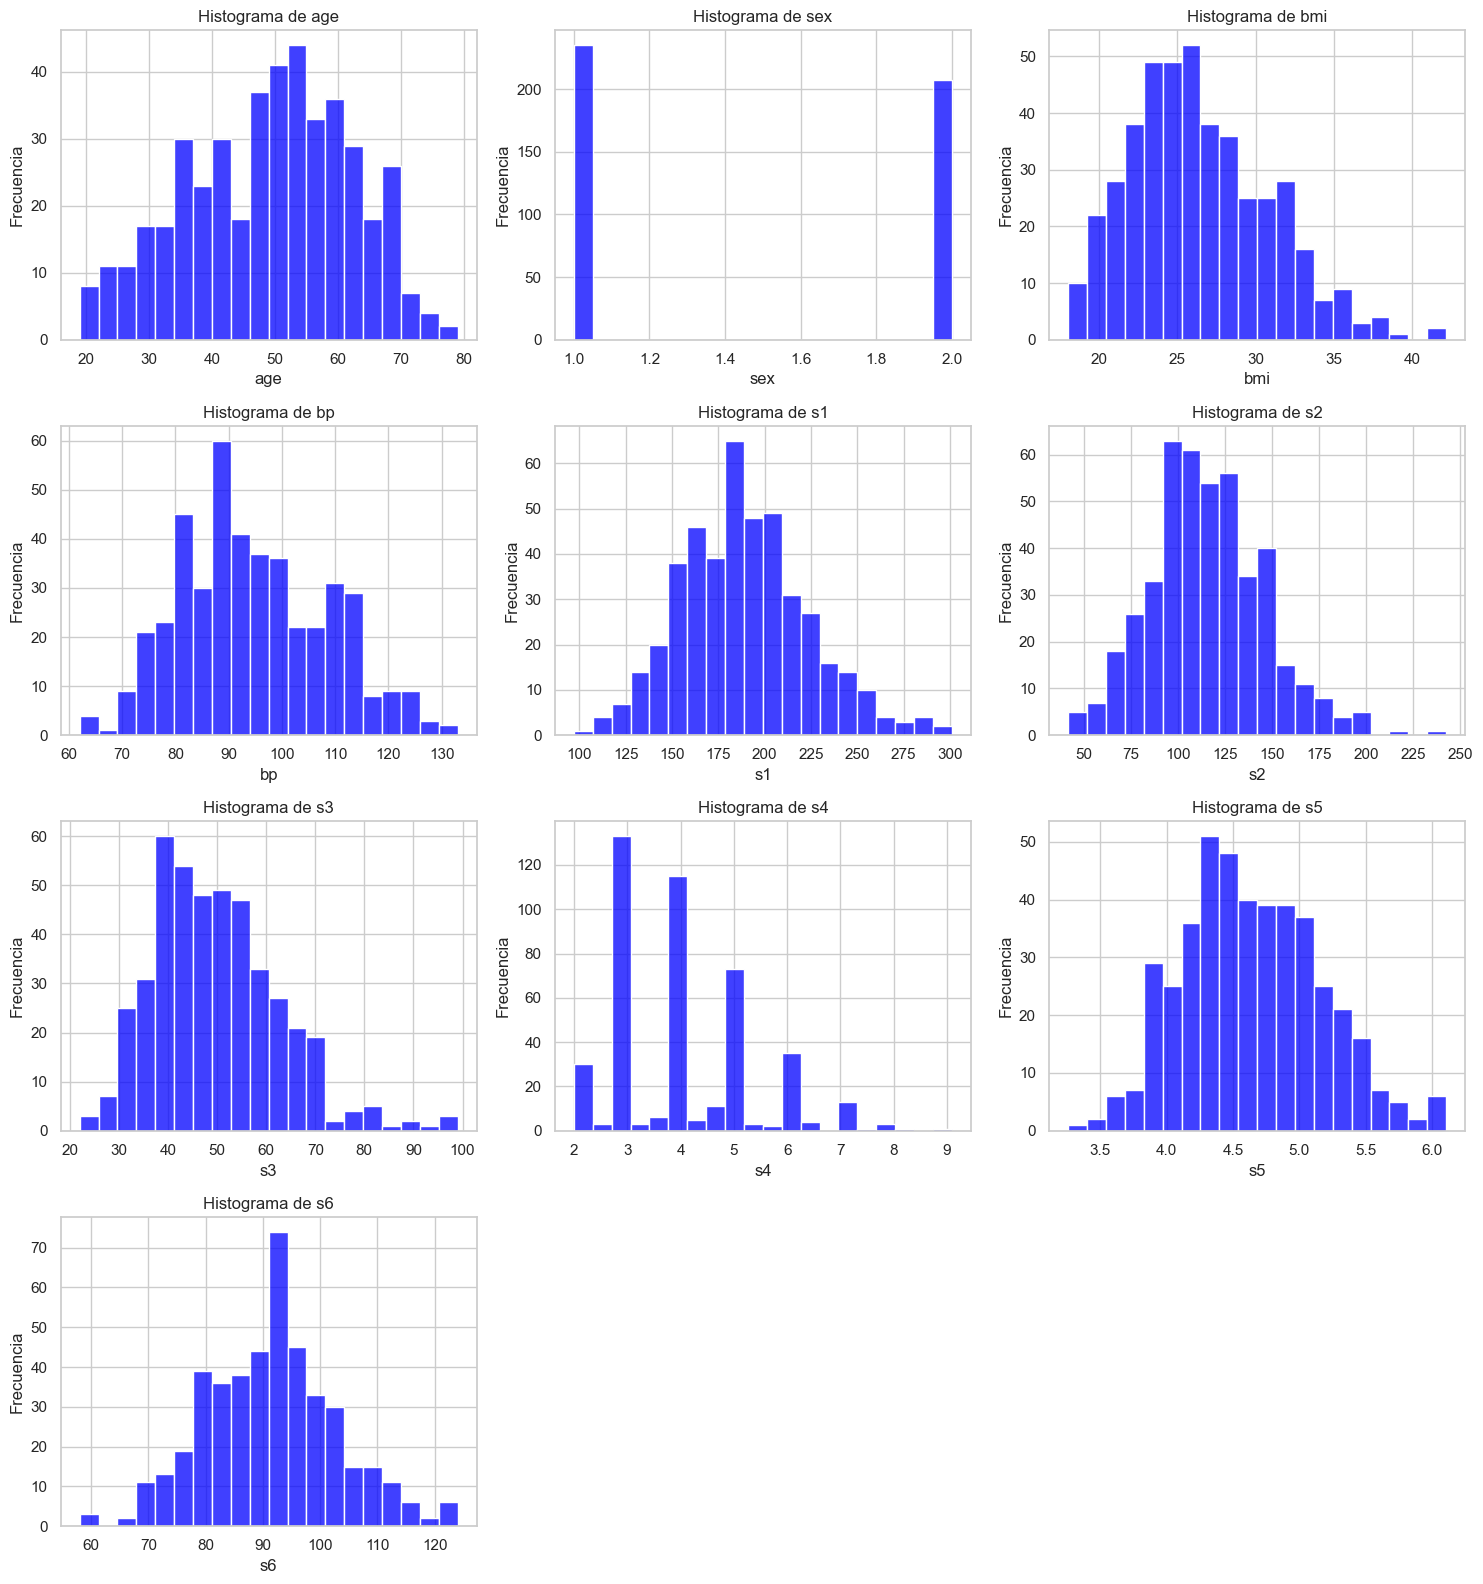

In [160]:
# Graficamos histogramas de las features
plot_histograms(X)

In [161]:
# Verificamos normalidad en features
check_normality(X)

Feature 'age' no se ajusta a una distribucion normal: p-valor = 0.00003
Feature 'sex' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'bmi' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'bp' no se ajusta a una distribucion normal: p-valor = 0.00007
Feature 's1' no se ajusta a una distribucion normal: p-valor = 0.00513
Feature 's2' no se ajusta a una distribucion normal: p-valor = 0.00131
Feature 's3' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 's4' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 's5' no se ajusta a una distribucion normal: p-valor = 0.00956
Feature 's6' no se ajusta a una distribucion normal: p-valor = 0.04095


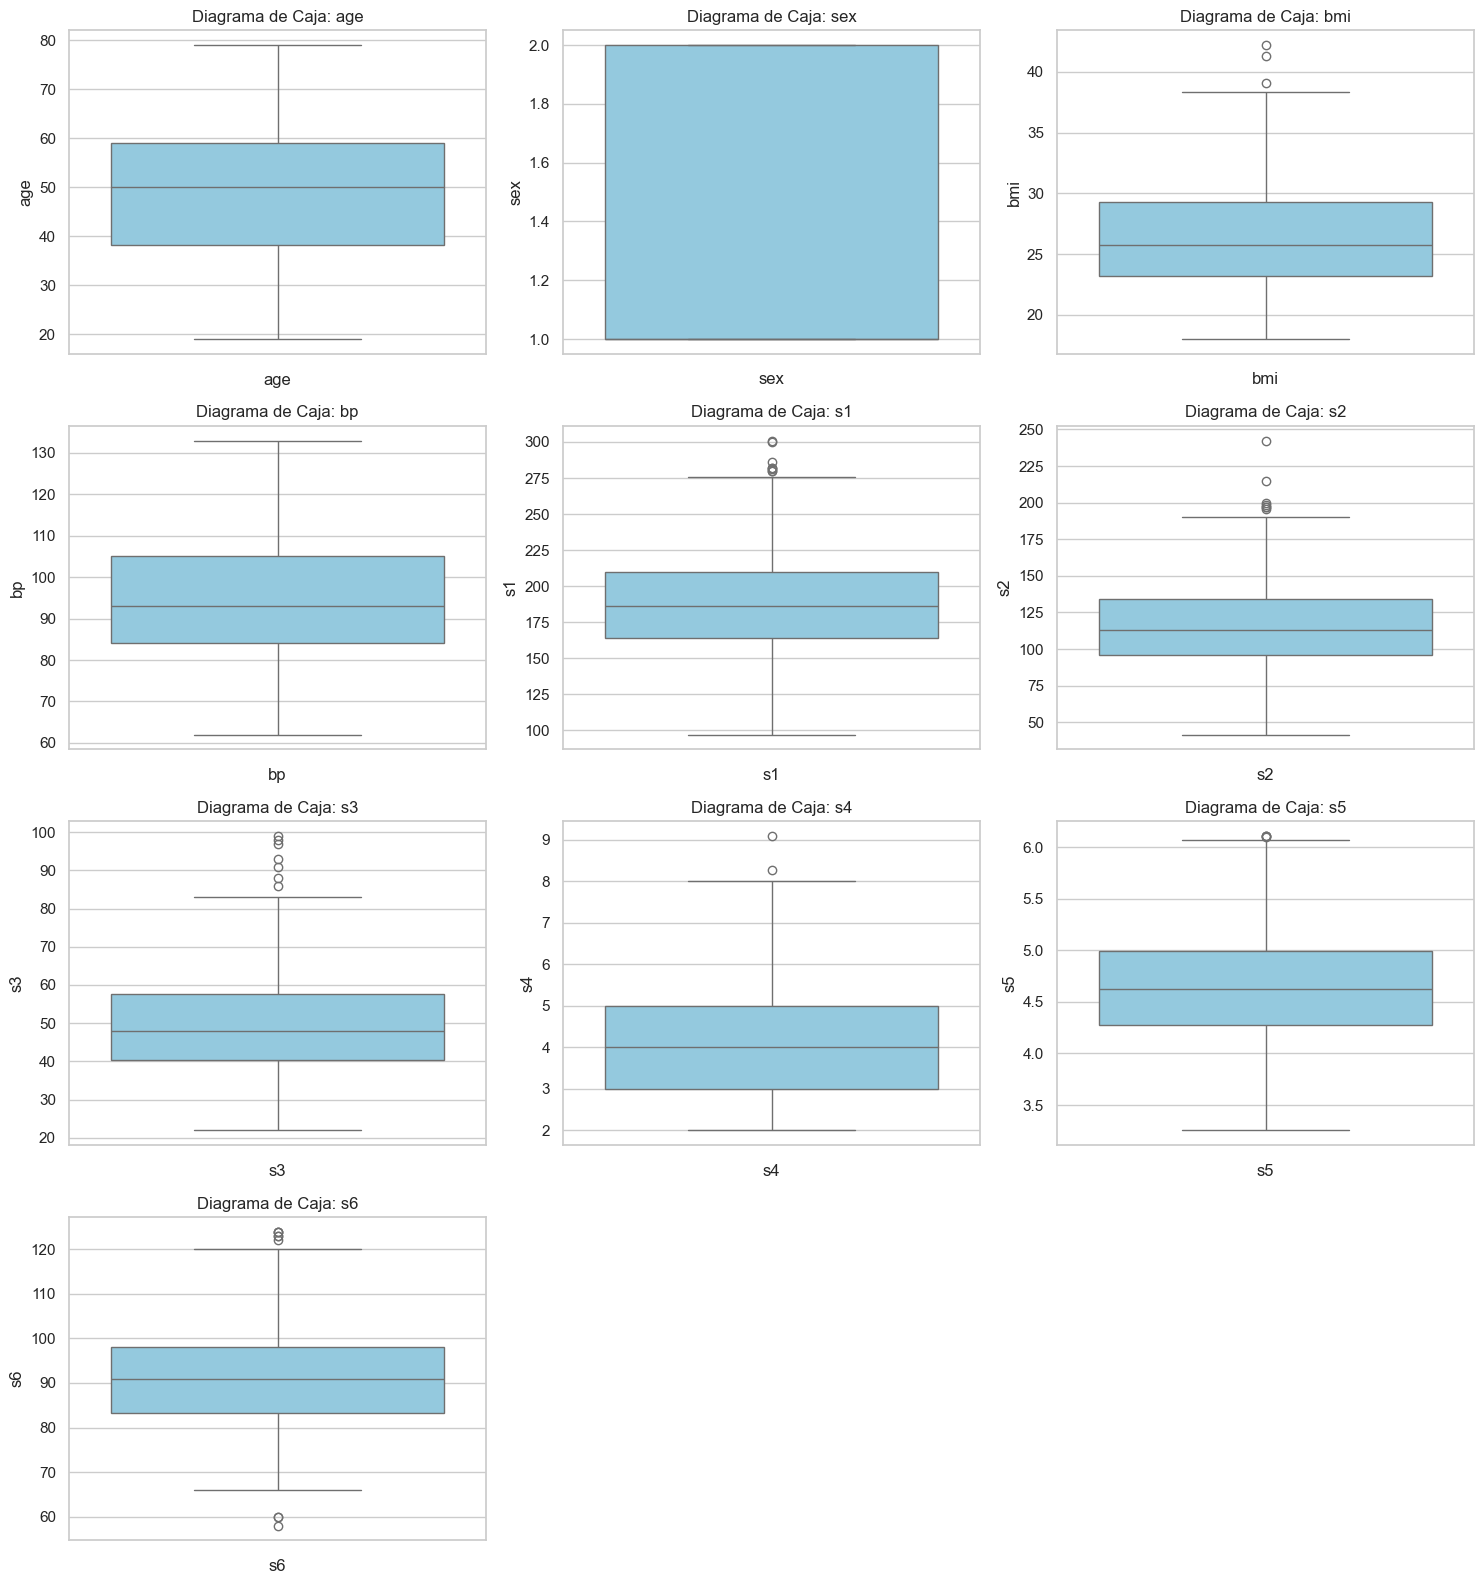

In [162]:
# Crear diagramas de caja para cada característica del dataset
plot_boxplots(X)

In [163]:
# Contamos el número de outliers presente en cada feature
outliers = {}
for feature in X.columns.to_list():
    outliers[feature] = count_outliers(X, feature)

print(outliers)

{'age': 0, 'sex': 0, 'bmi': 3, 'bp': 0, 's1': 8, 's2': 7, 's3': 7, 's4': 2, 's5': 4, 's6': 9}


In [164]:
# Contamos el número total de outliers
sum(outliers.values())

40

In [165]:
# Calculamos el coeficiente de asimetría o skewness de las features
X.skew()

age   -0.231382
sex    0.127385
bmi    0.598148
bp     0.290658
s1     0.378108
s2     0.436592
s3     0.799255
s4     0.735374
s5     0.291754
s6     0.207917
dtype: float64

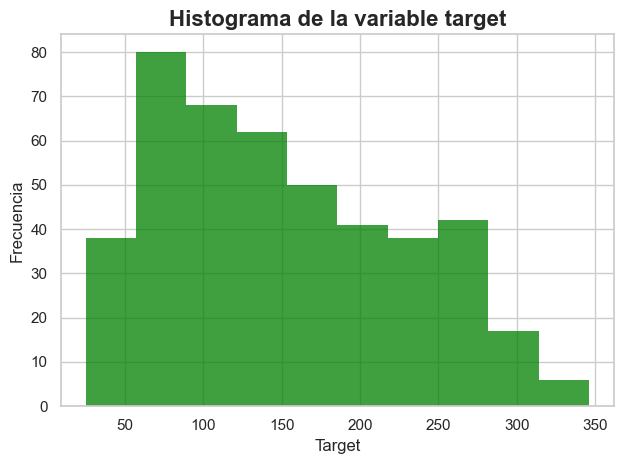

In [166]:
# Graficamos histograma para los targets
sns.histplot(y, bins=10, color='green', linewidth=0)

# Añadir título y etiquetas con mejor formato
plt.title('Histograma de la variable target', fontsize=16, weight='bold')
plt.xlabel('Target', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

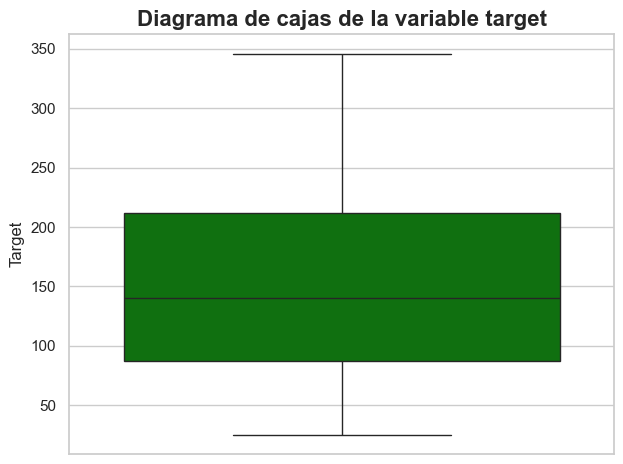

In [167]:
# Graficamos diagrama de cajas para los targets
sns.boxplot(data=y, color='green')

# Añadir título y etiquetas con mejor formato
plt.title('Diagrama de cajas de la variable target', fontsize=16, weight='bold')
plt.ylabel('Target', fontsize=12)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [168]:
# Calculamos el coeficiente de asimetría o skewness del target
y.skew()

0.44056293407014124

Conclusiones extraídas del análisis exploratorio:

- Las features presentan distintas escalas por lo que será necesario normalizar los valores para evitar que el modelo esté sesgado.
- Se observa la presencia de 40 valores outliers entre todas las features. Los coeficientes de asimetría obtenidos son inferiores a 1 en valor absoluto. Por lo tanto, se decide no tratar ni eliminar los outliers del dataset. Esta decisión se debe considerar como hiperparámetro para el modelo que se genere.
- Se observa visualmente que la distribución de la variable target presenta cierta asimetría positiva. Posibles consecuencias:
    - Violación del supuesto de linealidad (muchos modelos de regresión suponen que la variable dependiente sigue una distribución aproximadamente normal) lo que podría afectar la validez de los resultados y las inferencias del modelo.
    - Sesgo en los residuos del modelo (heterocedasticidad). Esto implica que el modelo sea más sensible a las observaciones comunes y menos preciso en la predicción de los valores extremos o los valores altos.

**Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba**

In [171]:
# Generamos los conjuntos TRAIN y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Elige un modelo de regresión para la evaluación. Por ejemplo, puedes elegir la Regresión Lineal o la Regresión de Ridge**

Se selecciona el modelo de Regresión de Ridge debido a los siguientes motivos:
- Reducción de posible efecto de multicolinealidad (no se ha analizado la multicolinealidad potencialmente existente entre las variables features)
- Reducción de posible overfitting (la regularización L2 limita el tamaño de los coeficientes, lo que evita que el modelo se ajuste excesivamente a las fluctuaciones del conjunto de entrenamiento)
- Menos sensibilidad a outliers en comparación con la regresión lineal

In [174]:
from sklearn.linear_model import Ridge

# Instanciamos modelo con hiperparámetro alpha=1
ridge = Ridge(alpha=1)

**Selecciona al menos dos métodos de normalización, como la normalización Min-Max y la estandarización StandardScaler**

**Aplica cada método de normalización por separado al conjunto de entrenamiento y ajusta el conjunto de prueba de manera correspondiente**

**Para cada versión normalizada del conjunto de entrenamiento, entrena ambos modelos de regresión seleccionados**

**Mantén constantes los demás parámetros del modelo para cada tipo de normalización para asegurar una comparación justa**

**Utiliza métricas de rendimiento adecuadas para la regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²), para evaluar cada modelo en el conjunto de prueba**

In [176]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

# Lista de normalizadores
normalizers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

# Creamos función que devuelve las principales métricas de evaluación de varios modelos
def get_model_scores(normalizers):
    # Iniciamos diccionarios para guardar resultados
    scores = {}
    
    for name, scaler in normalizers.items():
        # Aplicamos la normalización a los datos TRAIN y TEST
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Creamos y entrenamos el modelo Ridge
        ridge_model = Ridge(alpha=1.0, random_state=42)
        ridge_model.fit(X_train_scaled, y_train)
    
        # Realizamos predicciones con el modelo creado
        y_pred = ridge_model.predict(X_test_scaled)
        
        # Evaluamos modelo y guardamos resultados
        R2_score = R2(y_test, y_pred)
        MSE_score = MSE(y_test, y_pred)
        RMSE_score = RMSE(y_test, y_pred)
        MAE_score = MAE(y_test, y_pred)
        scores[name] = {'R2': R2_score, 'MSE': MSE_score, 'RMSE': RMSE_score, 'MAE': MAE_score}
    
    return scores

# Obtenemos scores de los modelos evaluados
models_score = get_model_scores(normalizers)

In [177]:
# Guardamos los resultados de evaluación de los modelos en un dataframe
df_scores = pd.DataFrame(models_score)

# Mostramos los resultados obtenidos
df_scores

,MinMaxScaler,StandardScaler
R2,0.459211,0.454147
MSE,2865.181635,2892.014566
RMSE,53.527391,53.777454
MAE,42.908127,42.811999


En la anterior tabla se observa como los dos modelos generados con diferentes técnicas de normalización presentan métricas de rendimiento muy similares. Por lo tanto, para este caso, no se puede afirmar que un modelo sea mejor que otro para predecir el estado de diabetes de un paciente.

**Compara el rendimiento de los modelos con diferentes métodos de normalización**

In [180]:
from sklearn.preprocessing import MaxAbsScaler, RobustScaler, Normalizer

# Instanciamos nuevos normalizadores
normalizers = {
    "MaxAbsScaler": MaxAbsScaler(),
    "RobustScaler": RobustScaler(),
    "Normalizer": Normalizer()
}

# Obtenemos scores de los modelos evaluados
models_score = get_model_scores(normalizers)

In [181]:
# Guardamos los resultados de evaluación de los modelos en un dataframe
df_scores_02 = pd.DataFrame(models_score)

# Concatenamos dataframes para unificar resultados
df_scores = pd.concat([df_scores, df_scores_02], axis=1)

# Mostramos resultados obtenidos
df_scores

,MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler,Normalizer
R2,0.459211,0.454147,0.448679,0.454951,0.217526
MSE,2865.181635,2892.014566,2920.984920,2887.753622,4145.663754
RMSE,53.527391,53.777454,54.046137,53.737823,64.386829
MAE,42.908127,42.811999,43.566237,42.826022,55.257243


**Basándote en los resultados, concluye sobre la importancia de la normalización en los modelos de regresión seleccionados y su influencia en la precisión del modelo**

A modo de resumen, en este ejercicio se han transformado los conjuntos TRAIN y TEST mediante las siguientes técnicas de normalización:

- `MinMaxScaler`: reescalado de los datos en el rango [0, 1]. Esta técnica es de utilidad cuando las features se encuentran en distintas escalas y se quieren unificar.

- `StandardScaler`: estandarizado de valores para que el conjunto tenga media 0 y desviación estándar 1. Esta técnica asume que los datos siguen una distribución normal o casi normal y es de utilidad su aplicación en modelos que se benefician de features centradas y con escalas similares como los modelos basados en gradientes o redes neuronales.

- `MaxAbsScaler`: escala cada característica dividiendo por el valor absoluto máximo de la característica, asegurando que todos los valores queden en el ranfo [-1, 1]. Al igual que StandardScaler, este método beneficia a modelos que precisan de features centradas y en escalas similares.

- `RobustScaler`: escala los datos utilizando el rango intercuartílico, siendo resistente a valores outliers por emplear cuartiles en vez de media y desviación estándar.

- `Normalizer`: normaliza las filas de la matriz de diseño para que tengan una norma igual a 1, transformando las características relativas de cada muestra, pero no su escala general.

Se han empleado las siguientes métricas para la evaluación de los cincos modelos creados:

- `R2` o coeficiente de determinación
- `MSE` (Mean Square Error)
- `RMSE` (Root Mean Square Error)
- `MAE` (Mean Absolute Residual)

La normalización de los datos es un paso muy importante de la fase de transformación de los datos en los modelos de regresión para evitar sesgos de características con gran influencia por tener una mayor escala. Además, mejora la convergencia durante el entrenamiento. Por otro lado, es importante seleccionar un método de normalización adecuado para los datos del problema (presencia de outliers, distribución de los datos, requisitos del modelo, etc). En el caso del dataset `diabetes`, se observa como las métricas de rendimiendo del modelo varían en función de la normalización llevada a cabo. Los métodos `MinMaxScaler`, `StandardScaler`, `MaxAbsScaler` y `RobustScaler` presentan métricas similares. Sin embargo, la normalización realizada mediante `Normalizer` posee unas métricas muy inferiores a los demás métodos.

##### Comparación de Modelos de Regresión Ridge, Lasso y Elastic Net con Scikit-Learn

- Importa los módulos necesarios para utilizar la regresión Ridge, Lasso y Elastic Net
- Elige y carga un dataset de Scikit-Learn adecuado para la regresión
- Realiza cualquier pre-procesamiento necesario en el dataset, **como la normalización de características si es necesario**
- Divide el dataset en conjuntos de entrenamiento y prueba usando la función train_test_split
- Configura y entrena un modelo de regresión para Ridge, Lasso y Elastic Net con el conjunto de entrenamiento.
- Asegúrate de experimentar con diferentes hiperparámetros para cada modelo, como el coeficiente de regularización
- Evalúa cada modelo con el conjunto de prueba utilizando métricas adecuadas para regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²)
- Compara cómo diferentes valores de hiperparámetros afectan el rendimiento de cada modelo.
- Analiza los resultados obtenidos y determina cuál modelo y configuración de hiperparámetros ofrece el mejor rendimiento
- Concluye sobre las características de cada modelo y cómo influyen en el ajuste a los datos

**Importa los módulos necesarios para utilizar la regresión Ridge, Lasso y Elastic Net**

In [186]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

**Elige y carga un dataset de Scikit-Learn adecuado para la regresión**

In [188]:
from sklearn.datasets import load_diabetes

# Descargamos Dataset "Diabetes dataset"
diabetes_dataset = load_diabetes(scaled=True)

In [189]:
# Mostramos por pantalla la descripción del dataset
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

**NOTA**: se ha cargado el dataset `diabetes` con el parámetro `scaled=True`. En la descripción del dataset podemos verificar que los valores de las features vienen centrados por la media y escalados por la desviación estándar multiplicada por la raíz cuadrada del número de instancias presentes en el dataset (442 instancias).

In [191]:
# Guardamos las features en formato DataFrame (matriz de diseño)
X = pd.DataFrame(data=diabetes_dataset.data, columns=diabetes_dataset.feature_names)

In [192]:
# Guardamos los targets en la variable en formato Serie
y = pd.Series(diabetes_dataset.target, name='target')

In [193]:
# Guardamos las features y los target en un DataFrame
df = pd.concat([X, y], axis=1)

# Mostramos las 5 primeras filas del DataFrame que contiene las features y el target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**Realiza cualquier pre-procesamiento necesario en el dataset, como la normalización de características si es necesario**

**NOTAS**:

- <mark>La fase de presentación y análisis exploratorio del dataset `diabetes` ya ha sido realizada en el Ejercicio 2.1</mark>
- <mark>Los datos de las features ya vienen centrados y escalados debido a que el dataset se ha cargado con el parámetro `scaled=True`</mark>

**Divide el dataset en conjuntos de entrenamiento y prueba usando la función train_test_split**

In [197]:
# Generamos los conjuntos TRAIN y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Configura y entrena un modelo de regresión para Ridge, Lasso y Elastic Net con el conjunto de entrenamiento**

**Asegúrate de experimentar con diferentes hiperparámetros para cada modelo, como el coeficiente de regularización**

**Evalúa cada modelo con el conjunto de prueba utilizando métricas adecuadas para regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²)**

**Compara cómo diferentes valores de hiperparámetros afectan el rendimiento de cada modelo**

**Analiza los resultados obtenidos y determina cuál modelo y configuración de hiperparámetros ofrece el mejor rendimiento**

In [199]:
# Creamos función que devuelve las principales métricas de evaluación de varios modelos
def get_model_scores(X_train, X_test, y_train, y_test):
    # Iniciamos diccionarios para guardar resultados
    scores = {
        'Ridge': {'R2': [], 'MSE': [], 'RMSE': [], 'MAE': []},
        'Lasso': {'R2': [], 'MSE': [], 'RMSE': [], 'MAE': []},
        'ElasticNet': {'R2': [], 'MSE': [], 'RMSE': [], 'MAE': []}
    }

    # Bucle para iterar sobre varios valores de alpha
    for alpha in np.logspace(-3, 2, 50):
        # Creamos, entrenamos y realizamos predicciones para el modelo Ridge
        ridge = Ridge(alpha=alpha, random_state=42)
        ridge.fit(X_train, y_train)
        y_pred_ridge = ridge.predict(X_test)
        # Guardamos métricas de evaluacion
        scores['Ridge']['R2'].append(R2(y_test, y_pred_ridge))
        scores['Ridge']['MSE'].append(MSE(y_test, y_pred_ridge))
        scores['Ridge']['RMSE'].append(RMSE(y_test, y_pred_ridge))
        scores['Ridge']['MAE'].append(MAE(y_test, y_pred_ridge))

        # Creamos, entrenamos y realizamos predicciones para el modelo Lasso
        lasso = Lasso(alpha=alpha, random_state=42)
        lasso.fit(X_train, y_train)
        y_pred_lasso = lasso.predict(X_test)
        # Guardamos métricas de evaluacion
        scores['Lasso']['R2'].append(R2(y_test, y_pred_lasso))
        scores['Lasso']['MSE'].append(MSE(y_test, y_pred_lasso))
        scores['Lasso']['RMSE'].append(RMSE(y_test, y_pred_lasso))
        scores['Lasso']['MAE'].append(MAE(y_test, y_pred_lasso))

        # Creamos, entrenamos y realizamos predicciones para el modelo ElasticNet
        elasticnet = ElasticNet(alpha=alpha, random_state=42)
        elasticnet.fit(X_train, y_train)
        y_pred_elasticnet = elasticnet.predict(X_test)
        # Guardamos métricas de evaluacion
        scores['ElasticNet']['R2'].append(R2(y_test, y_pred_elasticnet))
        scores['ElasticNet']['MSE'].append(MSE(y_test, y_pred_elasticnet))
        scores['ElasticNet']['RMSE'].append(RMSE(y_test, y_pred_elasticnet))
        scores['ElasticNet']['MAE'].append(MAE(y_test, y_pred_elasticnet))
    
    return scores

# Obtenemos scores de los modelos evaluados
models_score = get_model_scores(X_train, X_test, y_train, y_test)

Con el anterior código se obtienen las métricas de evaluación `R2`, `MSE`, `RMSE` y `MAE` para 50 valores distintos de coeficiente de regularización en los modelos `Ridge`, `Lasso` y `ElasticNet`.

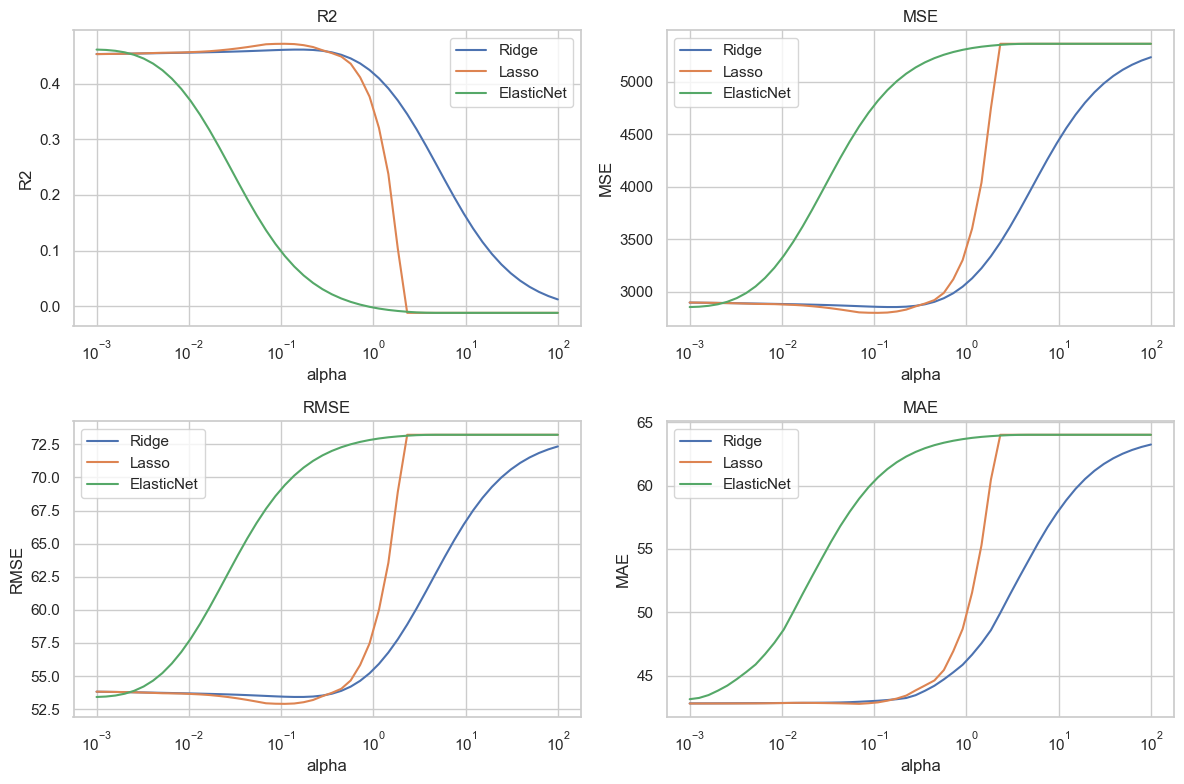

In [201]:
# Graficamos resultados obtenidos de métricas de rendimiendo
fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # Tamaño ajustado para mejor visibilidad

x = np.logspace(-3, 2, 50)

# Plot de R2
ax[0, 0].plot(x, models_score['Ridge']['R2'], label='Ridge')
ax[0, 0].plot(x, models_score['Lasso']['R2'], label='Lasso')
ax[0, 0].plot(x, models_score['ElasticNet']['R2'], label='ElasticNet')
ax[0, 0].set_title('R2')  # Título de cada subplot
ax[0, 0].set_xlabel('alpha') # Título de eje x
ax[0, 0].set_xscale('log') # Escala logatirmica para el eje x
ax[0, 0].set_ylabel('R2') # Título de eje y
ax[0, 0].legend()  # Mostrar leyenda
ax[0, 0].grid(True)  # Mostrar cuadrícula

# Plot de MSE
ax[0, 1].plot(x, models_score['Ridge']['MSE'], label='Ridge')
ax[0, 1].plot(x, models_score['Lasso']['MSE'], label='Lasso')
ax[0, 1].plot(x, models_score['ElasticNet']['MSE'], label='ElasticNet')
ax[0, 1].set_title('MSE')  # Título de cada subplot
ax[0, 1].set_xlabel('alpha') # Título de eje x
ax[0, 1].set_xscale('log') # Escala logatirmica para el eje x
ax[0, 1].set_ylabel('MSE') # Título de eje y
ax[0, 1].legend()  # Mostrar leyenda
ax[0, 1].grid(True)  # Mostrar cuadrícula

# Plot de RMSE
ax[1, 0].plot(x, models_score['Ridge']['RMSE'], label='Ridge')
ax[1, 0].plot(x, models_score['Lasso']['RMSE'], label='Lasso')
ax[1, 0].plot(x, models_score['ElasticNet']['RMSE'], label='ElasticNet')
ax[1, 0].set_title('RMSE')  # Título de cada subplot
ax[1, 0].set_xlabel('alpha') # Título de eje x
ax[1, 0].set_xscale('log') # Escala logatirmica para el eje x
ax[1, 0].set_ylabel('RMSE') # Título de eje y
ax[1, 0].legend()  # Mostrar leyenda
ax[1, 0].grid(True)  # Mostrar cuadrícula

# Plot de MAE
ax[1, 1].plot(x, models_score['Ridge']['MAE'], label='Ridge')
ax[1, 1].plot(x, models_score['Lasso']['MAE'], label='Lasso')
ax[1, 1].plot(x, models_score['ElasticNet']['MAE'], label='ElasticNet')
ax[1, 1].set_title('MAE')  # Título de cada subplot
ax[1, 1].set_xlabel('alpha') # Título de eje x
ax[1, 1].set_xscale('log') # Escala logatirmica para el eje x
ax[1, 1].set_ylabel('MAE') # Título de eje y
ax[1, 1].legend()  # Mostrar leyenda
ax[1, 1].grid(True)  # Mostrar cuadrícula

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Interpretación de resultados:

En la anterior imagen aparecen cuatro gráficas con una métrica de rendimiento cada una (`R2`, `MSE`, `RMSE` y `MAE`). Cada curva representa los valores de la métrica de los tres modelos evaluados en función del hiperparámetro `alpha`. A continuación, se indican las conclusiones extraídas de cada gráfica:

- Gráfica `R2`:
    - En el modelo `Ridge`, R2 se mantiene constante aproximadamente en un valor de 0.45 hasta que empieza a decaer agresivamente con valores de alpha próximos a 0.
    - En `Lasso`, se observa una tendencia alcista hasta alcanzar un valor R2 de 0.47 con alpha próximo a 0.1. A partir de este punto, R2 empieza a decaer agresivamente.
    - En `ElasticNet`, R2 se maximiza con los valores más bajos de alpha. Al incrementar un poco alpha, R2 cae agresivamente.

- Gráficas `MSE`, `RMSE` y `MAE`:
    - Las 3 gráficas se comportan de forma inversa a la gráfica R2.

La evidencia gráfica indica que el mejor modelo de todos los creados para estimar la diabetes es el de regresión `Lasso` con un valor de hiperparámetro alpha próximo a 0.1, debido a que presenta el mayor valor de `R2` y menores valores de `MSE`, `RMSE` y `MAE`.

In [203]:
# Obtenemos numéricamente el mejor modelo según la métrica de rendimiento R2
# Obtenemos índice del modelo con mejor R2
index = models_score['Lasso']['R2'].index(max(models_score['Lasso']['R2']))
print('Mejor modelo de regresión obtenido:')
print('Regresión Lasso')
print(f'Coeficiente de regularización: {np.logspace(-3, 2, 50)[index]:.3f}')
print(f'R2 = {max(models_score['Lasso']['R2']):.3f}')

Mejor modelo de regresión obtenido:
Regresión Lasso
Coeficiente de regularización: 0.110
R2 = 0.472


En línea con lo observado gráficamente, el mejor modelo de regresión creado según el criterio de evaluación R2 es el modelo de regresión `Lasso` con un valor de coeficiente de regularización `alpha=0.11`.

**Concluye sobre las características de cada modelo y cómo influyen en el ajuste a los datos**

<u>Regresión Ridge</u>

- La regresión Ridge es un método de regularización L2 lineal que ajusta el modelo minimizando la función de costo $L = ∑( Ŷi– Yi)^2 + α∑ β^2$ que incluye un término de penalización para reducir la magnitud de los coeficientes del modelo.
- Se utiliza para evitar el sobreajuste (disminuyendo magnitud de los coeficientes) y manejar multicolinealidad en los datos.
- Cuanto mayor sea el valor de alpha, más probable es que los coeficientes se acerquen cada vez más a cero y por tanto, puede producirse subajuste.
- Cuanto menor sea el valor de alpha, más generalizable es el modelo.
- Si alpha=0, el modelo se comporta igual que una regresión lineal por mínimos cuadrados.
- Ridge no elimina los coeficientes de las variables menos relevantes.

<u>Regresión Lasso</u>
- La regresión Ridge es un método de regularización L1 lineal que ajusta el modelo minimizando la función de costo $L = ∑( Ŷi– Yi)^2 + α∑ |β|$ que incluye un término de penalización para reducir la magnitud de los coeficientes del modelo y eliminar los menos relevantes (feature selection).
- Estos modelos se emplean para selección de características e interpretabilidad.
- Cuanto mayor sea el valor de alpha, aumenta la probabilidad de eliminar un mayor número de features en el modelo.
- Si alpha=0, el modelo se comporta igual que una regresión lineal por mínimos cuadrados.
- Como desventaja, si hay alta multicolinealidad, puede seleccionar una sola variable de un grupo correlacionado, eliminando variables independientes relevantes.

<u>Regresión ElasticNet</u>
- La regresión ElasticNet combina las propiedades de Lasso y Ridge para aprovechar las fortalezas de ambas regularizaciones. Es especialmente útil cuando existen muchas características correlacionadas y cuando se busca tanto reducir la magnitud de los coeficientes como realizar selección de características. La función de costo a minimizar es $L = ∑( Ŷi– Yi)^2 + α[(1-ρ)∑ β^2 + ρ∑ |β|]$
- El hiperparámetro alpha controla la regularización del modelo.
- El hiperparámetro ρ equilibra el peso de Ridge y Lasso. ρ=1 equivale a Lasso (penalización L1) y ρ=2 equivale a Lasso (penalización L2).
- Como limitaciones, este modelo es menos interpretable y requiere del ajuste de dos hiperparámetros.

### EJERCICIO 3

##### Realización de estrategias diferentes de Cross-Validation sobre un conjunto de datos y evaluar los resultados

- Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para el tipo de análisis que vas a realizar
- Si es necesario, realiza preprocesamientos como la **normalización** o la codificación de variables categóricas
- Elige un modelo de aprendizaje automático de Scikit-Learn adecuado para tu dataset entre los vistos en clase hasta ahora
- Selecciona al menos dos estrategias de validación cruzada para comparar. Por ejemplo, podrías elegir la validación cruzada K-Fold estándar (que la puedes configurar directamente con un número en el método cross_val_score), la validación cruzada estratificada (Stratified K-Fold) o la Repeated Stratified K-Fold
- Utiliza las funciones de Scikit-Learn para aplicar cada estrategia de validación cruzada al modelo y al conjunto de datos
- Registra los resultados de rendimiento que establezcas para cada iteración de la validación cruzada
- Analiza los resultados obtenidos de cada estrategia de validación cruzada
- Compara las métricas de rendimiento que establezcas, entre las diferentes estrategias, para ver cuál de los Cross-Validation ofrece una evaluación más robusta o resultados más consistentes (evaluar dispersión de los resultados para las repeticiones de cada fold)
- Reflexiona sobre cómo la elección de la estrategia de validación cruzada puede influir en la interpretación de la capacidad predictiva del modelo

**Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para el tipo de análisis que vas a realizar**

In [210]:
from sklearn.datasets import load_iris

# Descargamos Dataset "Wine dataset"
iris_dataset = load_iris()

In [211]:
# Mostramos por pantalla la descripción del dataset
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [212]:
# Guardamos las features en formato DataFrame (matriz de diseño)
X = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)

In [213]:
# Guardamos los targets en la variable en formato Serie
y = pd.Series(iris_dataset.target, name='target_number')

# Guardamos los targets en formato string
y_labels = y.map(lambda x: iris_dataset.target_names[x])
y_labels.name = 'target_label'

In [214]:
# Guardamos las features y los target en un DataFrame
df = pd.concat([X, y, y_labels], axis=1)

# Mostramos las 5 primeras filas del DataFrame que contiene las features y el target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_number,target_label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Si es necesario, realiza preprocesamientos como la normalización o la codificación de variables categóricas**

<u>Paso 1: PRESENTACIÓN DEL DATASET

In [217]:
# Mostramos la estructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_number      150 non-null    int32  
 5   target_label       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [218]:
# Mostramos dimensiones del dataset
df.shape

(150, 6)

In [219]:
# Verificamos presencia de valores NaN en el dataset
if df.isnull().sum().sum() == 0:
    print('No existen valores NaN en el dataset.')
else:
    print(f'Existen {df.isnull().sum().sum()} valores NaN en el dataset.')

No existen valores NaN en el dataset.


Presentación del dataset:

- El datasetirisne` registr413 características d3 clases e distint de flores (setosa, versicolor y virginica)co.
- El dataset contielas siguientes 4 característicasc
    - `sepal length (cm)`: longitud de sépalo en cma    - `sepal width (cm)`: ancho de sépalo en cm
    - `petal length (cm)`: longitud de pétalo en cm
    - `petal width (cm)`: ancho de pétalo en cmvino (mg/litro).
- La variable target del dataset se trata de una variable categórica (0, 1 o 2) e i florla clase del vino a la que pertenece la  (setosa, versicolor o virginica)muestra analizada.
- El dataset no presenta valores NaN

<u>Paso 2: ANÁLISIS EXPLORATORIO DE LOS DATOS

In [222]:
# Mostramos los principales estadísticos de las variables numéricas
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_number
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [223]:
# Matriz de correalación
df.drop('target_label', axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_number
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target_number,0.782561,-0.426658,0.949035,0.956547,1.000000


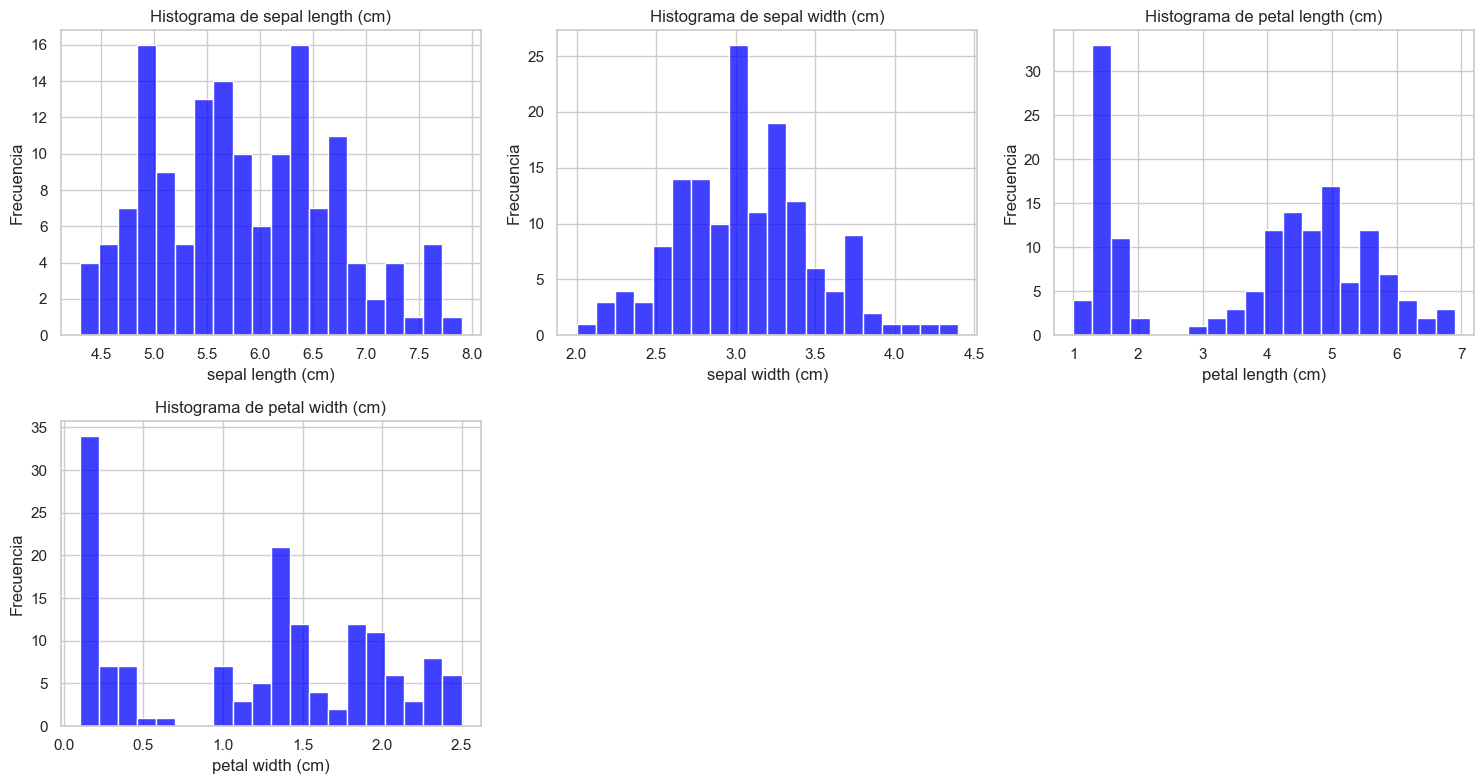

In [224]:
# Graficamos histogramas de las features
plot_histograms(X)

In [225]:
# Verificamos condicion de normalidad en las features
check_normality(X)

Feature 'sepal length (cm)' no se ajusta a una distribucion normal: p-valor = 0.01018
Feature 'petal length (cm)' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'petal width (cm)' no se ajusta a una distribucion normal: p-valor = 0.00000


In [226]:
# Calculamos asimetría de las features
X.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

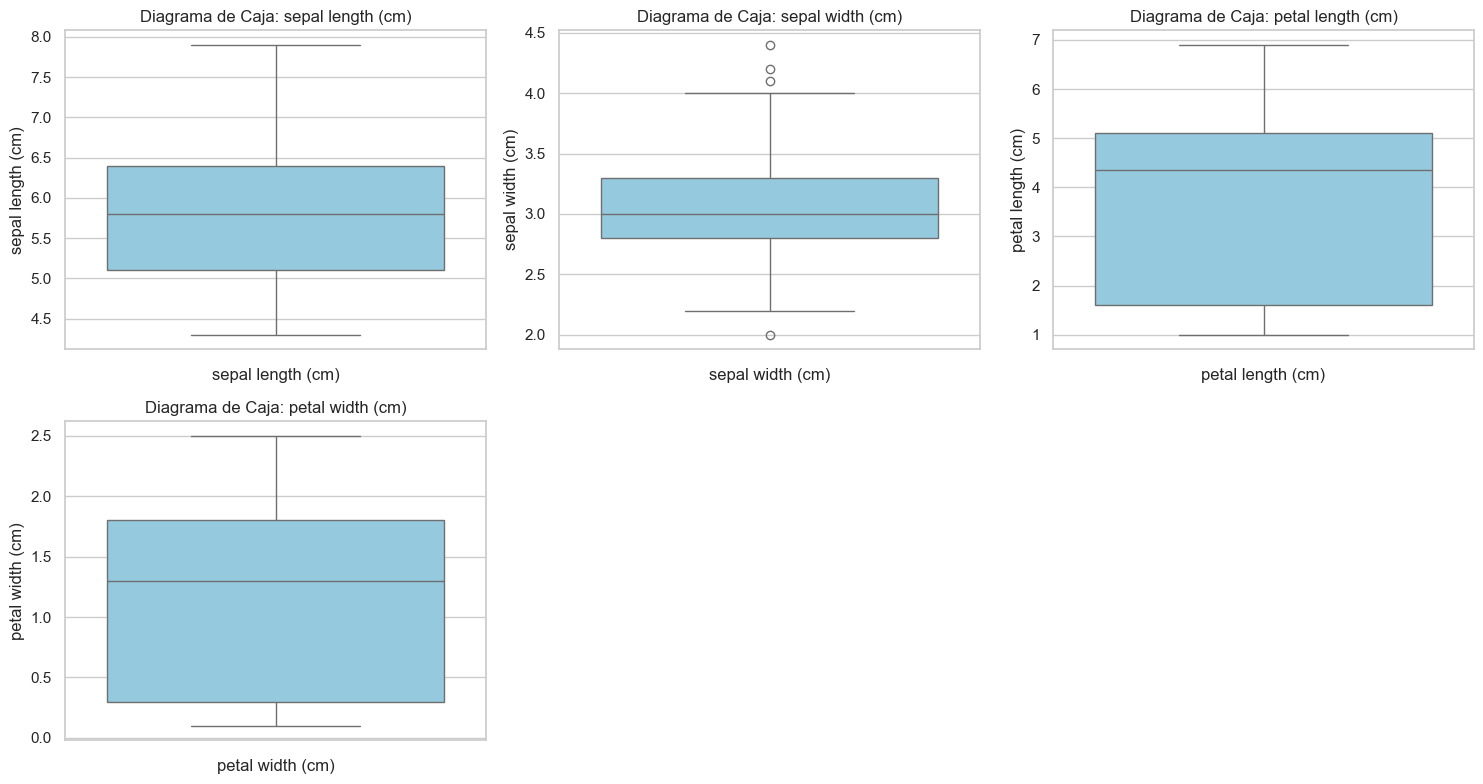

In [227]:
# Graficamos diagramas de caja de las features
plot_boxplots(X)

In [228]:
# Contamos el número de outliers presente en cada feature
outliers = {}
for feature in X.columns.to_list():
    outliers[feature] = count_outliers(X, feature)

print(outliers)

{'sepal length (cm)': 0, 'sepal width (cm)': 4, 'petal length (cm)': 0, 'petal width (cm)': 0}


In [229]:
# Contamos el número total de outliers
sum(outliers.values())

4

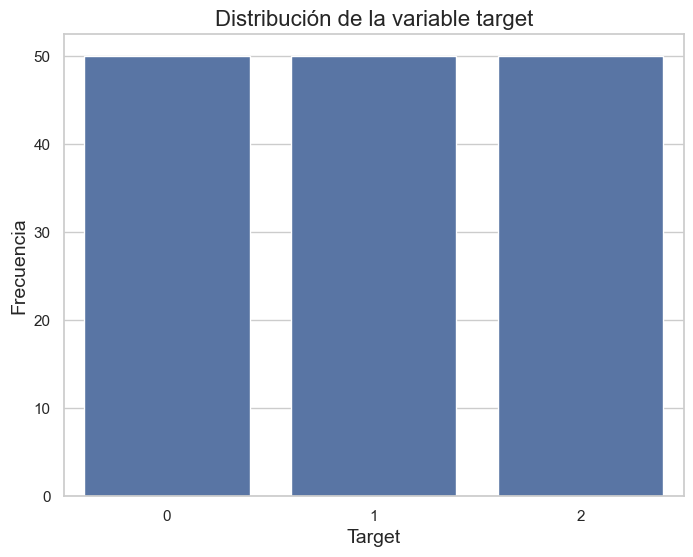

In [230]:
# Graficamos diagrama de barras para los targets

# Crear el diagrama de barras
plt.figure(figsize=(8, 6))
sns.countplot(x=y)

# Etiquetas y título
plt.title('Distribución de la variable target', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

Conclusiones extraídas del análisis exploratorio:

- Las features presentan escalas similares Sin embargo, se decide normalizar los valores para mejorar el rendimiento del modelo.
- Las features no se ajustan a una distribución normal y por lo tanto, no se puede emplear StandardScaler como método de normalización.
- Se observa la presencia de 4 valores outliers entre todas las features. MinMaxScaler no es recomendado en este caso debido a que los valores se pueden comprimir en un rango muy pequeño, lo que puede empeorar el rendimiento del modelo. Se recomienda usar RobusScaler ya que es más resistente a outliers.
- Las clases están perfectamente balanceadas con 50 muestras cada una. Sin embargo, dado que el número total de muestras es pequeño, se debe considerar la estratificación al crear los conjuntos TRAIN y TEST.
- Las features relacionadas con el pétalo tienen una correlación positiva muy fuerte con la variable target. Como proceso de feature selection, se considerarán únicamente las dos variables relacionadas con el pétalo (`petal length (cm)` y `petal width (cm)`) en la matriz de diseño.

<u>Paso 3: TRANSFORMACIÓN Y LIMPIEZA DE LOS DATOS

In [233]:
# Feature selection: consideramos únicamente las features relacionadas con el pétalo en la matriz de diseño
X.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)

In [234]:
# Normalizamos los datos mediante el método RobustScaler

# Instanciamos el scaler
scaler = RobustScaler()

# Entrenamos el scaler y normalizamos la matriz de diseño
X_scaled = scaler.fit_transform(X)

**Elige un modelo de aprendizaje automático de Scikit-Learn adecuado para tu dataset entre los vistos en clase hasta ahora**

In [236]:
# Instanciamos modelo KNN con n_neighbors = 8 y weights='uniform'
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')

# Entrenamos el modelo
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=8)

Se selecciona el modelo KNN como modelo de CLASIFICACIÓN del tipo de flor.

**Selecciona al menos dos estrategias de validación cruzada para comparar. Por ejemplo, podrías elegir la validación cruzada K-Fold estándar (que la puedes configurar directamente con un número en el método cross_val_score), la validación cruzada estratificada (Stratified K-Fold) o la Repeated Stratified K-Fold**

**Utiliza las funciones de Scikit-Learn para aplicar cada estrategia de validación cruzada al modelo y al conjunto de datos**

**Registra los resultados de rendimiento que establezcas para cada iteración de la validación cruzada**

**Analiza los resultados obtenidos de cada estrategia de validación cruzada**

**Compara las métricas de rendimiento que establezcas, entre las diferentes estrategias, para ver cuál de los Cross-Validation ofrece una evaluación más robusta o resultados más consistentes (evaluar dispersión de los resultados para las repeticiones de cada fold)**

**Reflexiona sobre cómo la elección de la estrategia de validación cruzada puede influir en la interpretación de la capacidad predictiva del modelo**

In [239]:
from sklearn.model_selection import cross_val_score

# Validación cruzada 5-Fold estándar
kfold_standard_results = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
print(f"Los resultados para las 5 particiones son: {kfold_standard_results}")
print(f"Es decir, tiene un resultado de: {kfold_standard_results.mean()} +/- {kfold_standard_results.std()}")

Los resultados para las 5 particiones son: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Es decir, tiene un resultado de: 0.96 +/- 0.024944382578492935


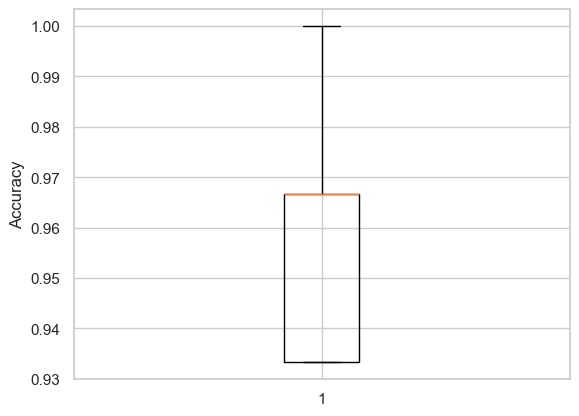

In [240]:
# Gráficamos diagrama de cajas de los resultados obtenidos
plt.boxplot(kfold_standard_results)
plt.ylabel('Accuracy')
plt.show()

In [241]:
from sklearn.model_selection import RepeatedStratifiedKFold

# Repeated Stratified 10-Fold con 5 repeticiones
RKFold = RepeatedStratifiedKFold(n_splits=5 ,n_repeats=20)
RKfold_results = cross_val_score(knn, X_scaled, y, cv=RKFold, scoring='accuracy')

print(f"Los resultados son: {RKfold_results}")
print(f"Es decir, tiene un resultado de: {RKfold_results.mean()} +/- {RKfold_results.std()}")

Los resultados son: [0.96666667 1.         0.96666667 0.9        0.96666667 0.93333333
 0.96666667 0.96666667 0.96666667 0.96666667 1.         0.93333333
 0.93333333 0.96666667 0.96666667 1.         0.96666667 0.93333333
 0.93333333 0.96666667 0.96666667 0.96666667 1.         0.86666667
 1.         0.96666667 0.96666667 1.         0.9        0.96666667
 0.93333333 0.96666667 1.         0.9        1.         1.
 0.96666667 1.         0.83333333 0.96666667 0.93333333 1.
 0.96666667 1.         0.93333333 0.93333333 1.         1.
 0.96666667 0.9        0.96666667 0.9        0.96666667 1.
 0.96666667 1.         1.         0.9        0.93333333 0.96666667
 0.93333333 1.         0.96666667 0.96666667 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.         0.9        0.96666667
 0.9        1.         1.         0.96666667 1.         0.9
 0.93333333 1.         0.96666667 1.         0.96666667 0.9
 0.96666667 0.96666667 1.         0.93333333 0.93333333 1.
 0.93333333 1.         0.9666

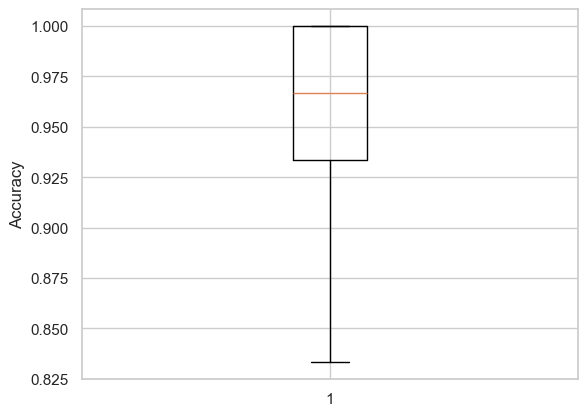

In [242]:
# Gráficamos diagrama de cajas de los resultados obtenidos
plt.boxplot(RKfold_results)
plt.ylabel('Accuracy')
plt.show()

En este apartado se ha evaluado el accuracy del modelo creado mediante dos técnicas de validación cruzada (K-Fold estándar y Repeated Stratified K-Fold).

Para la primera técnica K-Fold estándar, se han empleado 5 particiones. En cada partición, se genera un conjunto TRAIN y TEST considerando la estratificación de clases y se evalua el accuracy del modelo. El método `cross_val_score` devuelve una lista con 10 valores de accuracy correspondiente a cada partición. Con esta técnica, se ha obtenido un accuracy medio de 0.96 con una desviación estándar de 0.02.

En la segunda técnica Repeated Stratified K-Fold, se realiza el mismo proceso pero repetido 20 veces. En cada repetición se escogen diferentes muestras para formar los conjuntos. Una vez realizado todo el proceso, se ha obtenido un accuracy medio de 0.96 con una desviación estándar de 0.03.

Analizando los resultados, se puede afirmar que el segundo método Repeated Stratified K-Fold devuelve un resultado de accuracy más robusto, debido a que se han realizado x20 veces más experimentos que en K-Fold estándar con diferentes combinaciones de muestras para formar más conjuntos de TRAIN y TEST. Este incremento en el número de experimentos captura mejor la variabilidad del modelo frente a diferentes divisiones, proporcionando una evaluación más completa. Se puede observar como la desviación estándar (varianza) aumenta en Repeated Stratified K-Fold en comparación con K-Fold estándar.

En conclusión, en este ejercicio se ha visto la importancia de generar múltiples conjuntos de TRAIN y TEST distintos y evaluarlos para obtener un valor de métrica de rendimiento más robusto en comparación con el obtenido si solo se genera un único conjunto TRAIN y TEST para la evaluación del modelo. Este proceso es de vital importancia cuando se tienen datasets con pocas muestras y/o clases desbalanceadas ya que un único conjunto TRAIN y TEST puede devolver un resultado de rendimiento demasiado optimista por pura aleatoriedad.

##### Buscar parámetros óptimos con GridSearchCV entrenando modelos SVM

- Importa las librerías y módulos necesarios de Python y Scikit-Learn, incluyendo el módulo svm para el modelo SVM y model_selection para GridSearchCV
- Elige y carga un dataset de Scikit-Learn adecuado para trabajar con un modelo SVM
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split
- Crea una instancia del modelo SVM que deseas optimizar
- Establece un diccionario de parámetros para probar con GridSearch. Incluye parámetros como C, kernel, gamma y otros relevantes para el modelo SVM
- Configura GridSearchCV con el modelo SVM, el diccionario de parámetros, y cualquier otra configuración relevante como la métrica de evaluación y el número de folds para la validación cruzada
- Entrena GridSearchCV con el conjunto de entrenamiento para buscar los mejores parámetros
- Una vez que GridSearchCV haya encontrado la mejor combinación de parámetros, evalúa este modelo óptimo en el conjunto de prueba
- Utiliza métricas de rendimiento adecuadas, como la precisión o el área bajo la curva ROC, para evaluar su desempeño
- Revisa los parámetros que GridSearchCV ha identificado como óptimos

**Importa las librerías y módulos necesarios de Python y Scikit-Learn, incluyendo el módulo svm para el modelo SVM y model_selection para GridSearchCV**

In [246]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

**Elige y carga un dataset de Scikit-Learn adecuado para trabajar con un modelo SVM**

In [248]:
from sklearn.datasets import load_breast_cancer

# Descargamos Dataset "load_breast_cancer"
breast_cancer_dataset = load_breast_cancer()

In [249]:
# Guardamos las features en formato DataFrame (matriz de diseño)
X = pd.DataFrame(data=breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

In [250]:
# Guardamos los targets en la variable en formato Serie
y = pd.Series(breast_cancer_dataset.target, name='cancer_type_number')

# Guardamos los targets en formato string
y_labels = y.map(lambda x: breast_cancer_dataset.target_names[x])
y_labels.name = 'cancer_type_label'

In [251]:
# Guardamos las features y los target en un DataFrame
df = pd.concat([X, y, y_labels], axis=1)

# Mostramos las 5 primeras filas del DataFrame que contiene las features y el target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type_number,cancer_type_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


**NOTA**:

- <mark>La fase de presentación y análisis exploratorio del dataset `breast_cancer` ya ha sido realizada en el Ejercicio 1.2</mark>

**Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split**

<u>Paso 3: TRANSFORMACIÓN Y LIMPIEZA DE LOS DATOS

In [254]:
# Generamos los conjuntos TRAIN y TEST teniendo en cuenta el desbalanceo de la variable target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [255]:
# Tratamiento de outliers mediante transformación logarítmica
# Transformación logarítmica de las features con asimetría fuertemente positiva
# Realizamos tranformación logarítmica sobre los conjuntos TRAIN y TEST
X_train_skewed = log_transformation(X_train)
X_test_skewed = log_transformation(X_test)

In [256]:
# Normalizamos los datos mediante el método RobustScaler

# Instanciamos el scaler
scaler = RobustScaler()

# Entrenamos el scaler con el conjunto TRAIN y normalizamos el conjunto TRAIN
X_train_skewed_scaled = scaler.fit_transform(X_train_skewed)

# Normalizamos el conjunto TEST
X_test_skewed_scaled = scaler.transform(X_test_skewed)

In [257]:
# Realizamos reducción de dimensiones mediante PCA
# Reducimos a 2 dimensiones para poder visualizar posteriormente las fronteras de decisiones del modelo KNN

# Instanciamos el reductor de dimensiones
pca = PCA(n_components=2)

# Entrenamos el reductor con el conjunto TRAIN y aplicamos PCA al conjunto TRAIN
X_train_skewed_scaled_pca = pca.fit_transform(X_train_skewed_scaled)

# Aplicamos PCA al conjunto TEST
X_test_skewed_scaled_pca = pca.transform(X_test_skewed_scaled)

**Crea una instancia del modelo SVM que deseas optimizar**

In [1040]:
# Instanciamos el modelo SVC
svc = svm.SVC(random_state=42, probability=True, class_weight={0:3.5, 1:1})

# Mostramos por pantalla los hiperparámetros por defecto del modelo
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': {0: 3.5, 1: 1},
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Establece un diccionario de parámetros para probar con GridSearch. Incluye parámetros como C, kernel, gamma y otros relevantes para el modelo SVM**

In [1068]:
# Creamos diccionario con malla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]
}

**Configura GridSearchCV con el modelo SVM, el diccionario de parámetros, y cualquier otra configuración relevante como la métrica de evaluación y el número de folds para la validación cruzada**

In [1071]:
# Instanciamos GridSearchCV
grid = GridSearchCV(svc, cv=3, param_grid=param_grid, scoring='precision', verbose=2)

**Entrena GridSearchCV con el conjunto de entrenamiento para buscar los mejores parámetros**

In [1074]:
%%time

# Entrenamos GridSearchCV con el conjunto TRAIN
grid.fit(X_train_skewed_scaled_pca, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=auto, 

C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

[CV] END ........C=0.001, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.001, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .........C=0.001, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .........C=0.001, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .........C=0.001, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.001, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

[CV] END ..........C=0.01, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .......C=0.01, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, d

C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, 

C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alber\AppData\Local\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

[CV] END .............C=1, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
CPU times: total: 1.03 s
Wall time: 1.14 s


GridSearchCV(cv=3,
             estimator=SVC(class_weight={0: 3.5, 1: 1}, probability=True,
                           random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='precision', verbose=2)

In [1076]:
# Obtenemos la mejor combinación de hiperparámetros encontrada por GridSearchCV
grid.best_params_

{'C': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [1078]:
# Obtenemos el mejor modelo encontrado por GridSearchCV
svc_best_model = grid.best_estimator_

**Una vez que GridSearchCV haya encontrado la mejor combinación de parámetros, evalúa este modelo óptimo en el conjunto de prueba**

**Utiliza métricas de rendimiento adecuadas, como la precisión o el área bajo la curva ROC, para evaluar su desempeño**

In [1081]:
# Obtenemos predicciones del modelo sobre el conjunto TEST
y_pred = svc_best_model.predict(X_test_skewed_scaled_pca)

In [1083]:
# Mostramos por pantalla las métricas de precision, recall y f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        42
           1       1.00      0.61      0.76        72

    accuracy                           0.75       114
   macro avg       0.80      0.81      0.75       114
weighted avg       0.85      0.75      0.76       114



In [1085]:
from sklearn.metrics import confusion_matrix

# Mostramos por pantalla la matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[42  0]
 [28 44]]


AUC: 0.972


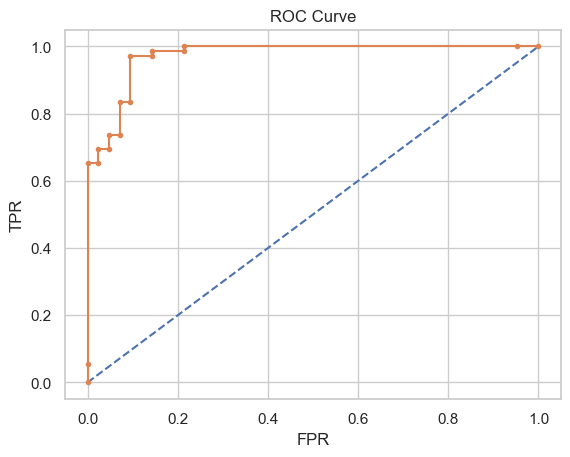

In [1087]:
# Curva ROC y AUC

# Obtener las probabilidades predichas
y_probs = svc_best_model.predict_proba(X_test_skewed_scaled_pca)[:, 1]  # Probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc:.3f}")

# Graficamos Curva ROC
plt.plot([0, 1], [0, 1], linestyle='--') # Plot recta de clasificador aleatorio
plt.plot(fpr, tpr, marker='.') # Plot curva ROC
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

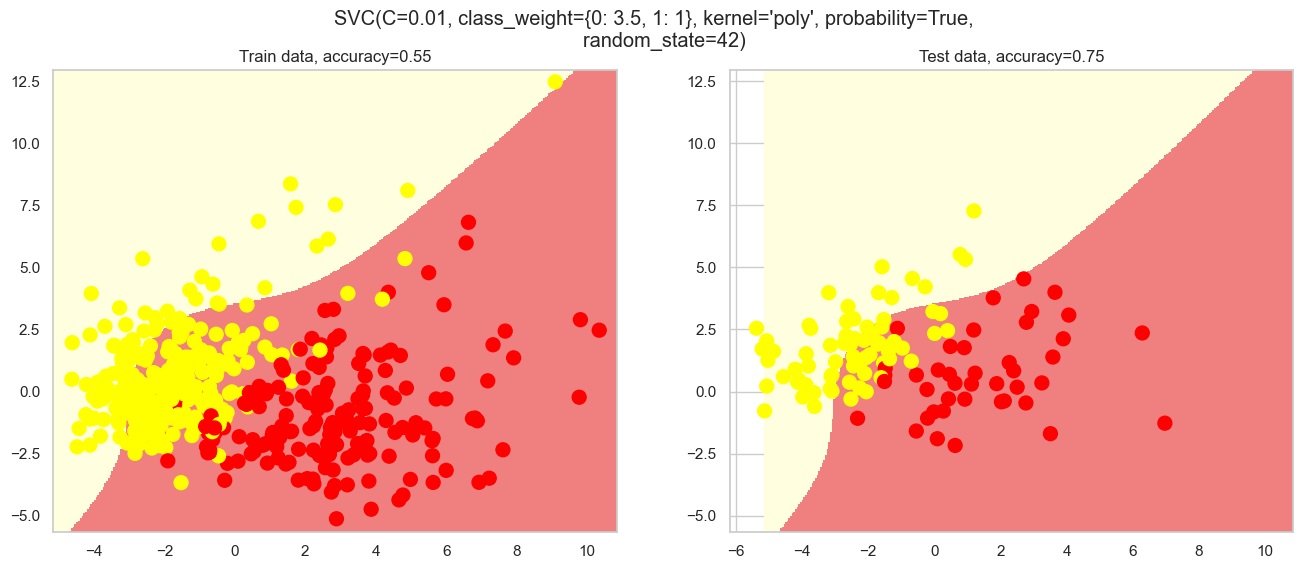

In [1089]:
# Graficamos límites de decisión para conjuntos TRAIN y TEST del mejor modelo obtenido
plot_decision_surface(svc_best_model, X_train_skewed_scaled_pca, y_train, X_test_skewed_scaled_pca, y_test)

El modelo `SVC` tiene como objetivo predecir el tipo de tumor (maligno o benigno) en base a 30 características del mismo. En esta situación, el modelo debe priorizar la no presencia de falsos negativos. Es decir, se debe evitar que el modelo prediga un tumor benigno cuando realmente es maligno. Dado que el dataset presenta mayores muestras de tumores benignos, se ha forzado al modelo para que sea penalizado más ante errores de predicción de tumores malignos en comparación con la predicción de tumores benignos. Esto se ha realizado mediante el parámetro ``class_weight={0:3.5, 1:1}`` a la hora de instanciar el modelo. Es decir, se penaliza x3.5 veces más la clasificación incorrecta de tumores malignos que benignos.

Por lo que se respecta al ajuste de hiperparámetros:

- Se ha definido una malla de distintas combinaciones de hiperparámetros para ser pasada al método `GridSGridSearchCV`.
- Se han empleado 3 folds para la evaluación del rendimiento del modelo mediante validación cruzada.
- Se ha pasado el parámetro `scoring='precision'` al método `GridSGridSearchCV` para que se elija el mejor modelo en base a la métrica de precisión.

Dado que el principal objetivo del modelo es eliminar los falsos negativos, la mejor métrica para evaluar este modelo es la precisión. Una precisión de 1 significa que el número de falsos negativos predichos por el modelo es de 0.

En la matriz de confusión se observa como el modelo ha conseguido el objetivo de 0 falsos positivos a costa de incrementar el número de falsos positivos a 28 casos.

**Revisa los parámetros que GridSearchCV ha identificado como óptimos**

In [1094]:
# Obtenemos los hiperparámetros del mejor modelo obtenido mediante GridSearchCV
svc_best_model.get_params()

{'C': 0.01,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': {0: 3.5, 1: 1},
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

En el anterior diccionario podemos encontrar todos los hiperparámetros del mejor modelo obtenido mediante `GridSearchCV`.

La malla de hiperparámetros a probar por `GridSearchCV` estaba formada por los hiperparámetros `C` (parámetro de regularización), ``kernel`` (kernel a emplear en el algoritmo), ``gamma`` (coeficiente del kernel) y ``degree`` (grado polinómico para el kernel tipo polinómico). Se observa como la mejor combinación de hiperparámetros encontrada por `GridSGridSearchCV` es la siguiente:

- ``C=0.01``
- ``kernel=poly``
- ``gamma=scale``
- ``degree=3``